In [1]:
#References
#https://rnaseq.uoregon.edu/#analysis-aligning-to-a-transcriptome
#https://www.biostars.org/p/212687/
#https://www.biostars.org/p/124298/
#https://www.researchgate.net/post/How_can_I_combine_forward_and_reverse_illumina_reads_in_one_fragment_recruitment_analysis

In [1]:
import pickle
from Bio import SeqIO
from collections import defaultdict
import collections
import matplotlib.pyplot as plt

In [2]:
k = 11

In [3]:
#### Pickle Module to save and load dictionary later on

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open( name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [5]:
d = load_obj('genome_index_full')

In [4]:
r1_list = []
r1_str= " "
for record in SeqIO.parse('/Users/aneruthmohanasundaram/Documents/GitHub/Advance-Bioinformatics/Assignment 2/Datasets/10k_reads.fastq', "fastq"):
#     print(record.seq)
    if record.seq != ' ':
        r1_list.append(str(record.seq).replace('N',''))

In [7]:
r2_list = []
r2_str= " "
for record in SeqIO.parse("10000_R2.fastq", "fastq"):
#     print(record.seq)
    if record.seq != ' ':
        r2_list.append(str(record.seq).replace('N',''))

In [7]:
len(r1_list)

10000

In [5]:
print(len(r1_list[2]))
r1_list[2] #RANDOM TEST OF MEMORY

36


'TCTCGCATACGCGATCATATTTCACCCTATAATATG'

In [9]:
reference_list = []
reference_str= " "

for record in SeqIO.parse('/Users/aneruthmohanasundaram/Documents/GitHub/Advance-Bioinformatics/Assignment 2/Datasets/dm6.fa', "fasta"):
    if record.seq != ' ':
        reference_list.append(record.seq)
reference_str = ''.join(map(str, reference_list)).upper()

In [12]:
top_score = [0] * len(r1_list)

for z in range(len(r1_list)):    
# for z in range(100,200):
    read = r1_list[z]
    correct = 0
    ref = ''

    s = read[:11]
    if s in d:
        indices = d[s]
        print('\n\nThe seed at index: ' + str(z)+ ' is: ' + s)
        print('There are ' + str(len(indices)) + ' matches for read at index: ' + str(z))
        for index in indices:
            ref = reference_str[index:index+len(read)]
            for x in range(len(ref)):
                if ref[x] == read[x] or read[x] == 'N' or ref[x] == 'N':           
                    correct = correct + 1
            perc = (correct / len(ref)) * 100
            if perc > top_score[z]:
                top_score[z] = perc
            
            correct = 0
            ref = ''
            if top_score[z] == 100:
                break
    else:
        print('no match found for index:' + str(z) )



The seed at index: 0 is: TCATCTCCACC
There are 87 matches for read at index: 0


The seed at index: 1 is: TTGAGTTCCAT
There are 40 matches for read at index: 1


The seed at index: 2 is: AGCAGCATGGC
There are 144 matches for read at index: 2


The seed at index: 3 is: CGCCACATCGA
There are 72 matches for read at index: 3


The seed at index: 4 is: TGGACAGTGCG
There are 56 matches for read at index: 4


The seed at index: 5 is: AAGCGCAACAC
There are 28 matches for read at index: 5


The seed at index: 6 is: GAGAACCAGCA
There are 96 matches for read at index: 6


The seed at index: 7 is: GACAATTGAAA
There are 27 matches for read at index: 7


The seed at index: 8 is: ATTTAGCTTAG
There are 29 matches for read at index: 8


The seed at index: 9 is: AGAAATACGTC
There are 20 matches for read at index: 9


The seed at index: 10 is: GTCAATCTACA
There are 6 matches for read at index: 10


The seed at index: 11 is: ACAAATCAAAA
There are 213 matches for read at index: 11


The seed at index: 12



The seed at index: 101 is: CCGCGGTGTAA
There are 12 matches for read at index: 101


The seed at index: 102 is: GCGCGGAATGC
There are 54 matches for read at index: 102


The seed at index: 103 is: AAAAAAAAAAA
There are 297907 matches for read at index: 103


The seed at index: 104 is: CTGGCCTTTGT
There are 79 matches for read at index: 104


The seed at index: 105 is: CGGCGGAGCTG
There are 255 matches for read at index: 105


The seed at index: 106 is: AAAAAAAAAAA
There are 297907 matches for read at index: 106


The seed at index: 107 is: AAAAAAAAAAA
There are 297907 matches for read at index: 107


The seed at index: 108 is: CGGTAGTAAAG
There are 16 matches for read at index: 108


The seed at index: 109 is: GTGAATTAAAG
There are 37 matches for read at index: 109


The seed at index: 110 is: GCAGTGCGCAA
There are 60 matches for read at index: 110


The seed at index: 111 is: AAAAAAAAAAA
There are 297907 matches for read at index: 111


The seed at index: 112 is: CATCGCTGAGA
There a



The seed at index: 218 is: CCGGCAAGCTT
There are 95 matches for read at index: 218


The seed at index: 219 is: CTGGTTTCCGA
There are 34 matches for read at index: 219


The seed at index: 220 is: CCGGCGGCAGG
There are 69 matches for read at index: 220


The seed at index: 221 is: GTTGTGTTGTG
There are 56 matches for read at index: 221


The seed at index: 222 is: GCCGCACTTCT
There are 57 matches for read at index: 222


The seed at index: 223 is: CTCATGTCGAT
There are 21 matches for read at index: 223


The seed at index: 224 is: CAGACTTCTCC
There are 9 matches for read at index: 224


The seed at index: 225 is: GTCCCGAGGAG
There are 106 matches for read at index: 225
no match found for index:226


The seed at index: 227 is: CGTCCATCCAC
There are 55 matches for read at index: 227


The seed at index: 228 is: CCGACCCCAAC
There are 23 matches for read at index: 228


The seed at index: 229 is: TAGCGATACAG
There are 15 matches for read at index: 229


The seed at index: 230 is: AAAAAAA



The seed at index: 326 is: CGGATACGGAC
There are 140 matches for read at index: 326


The seed at index: 327 is: GTGCTAGGCAA
There are 9 matches for read at index: 327


The seed at index: 328 is: GTCCTTGTCGA
There are 47 matches for read at index: 328


The seed at index: 329 is: ACTGCCTATGC
There are 21 matches for read at index: 329


The seed at index: 330 is: CTGGTTGCTAT
There are 32 matches for read at index: 330


The seed at index: 331 is: GGAGGAGGCAC
There are 160 matches for read at index: 331


The seed at index: 332 is: AAAAAAAAAAA
There are 297907 matches for read at index: 332


The seed at index: 333 is: CCAAGAACCCA
There are 66 matches for read at index: 333


The seed at index: 334 is: GCGGCCTGCAG
There are 73 matches for read at index: 334


The seed at index: 335 is: CCCTGATGGAG
There are 64 matches for read at index: 335


The seed at index: 336 is: CGGCGTCCTGC
There are 88 matches for read at index: 336


The seed at index: 337 is: CGACGACCCAA
There are 31 matche



The seed at index: 435 is: CAAGAAGCAAG
There are 97 matches for read at index: 435


The seed at index: 436 is: GGCGTTCGCAA
There are 17 matches for read at index: 436


The seed at index: 437 is: GAACACCAGTG
There are 51 matches for read at index: 437


The seed at index: 438 is: GTGGTGCGCTG
There are 67 matches for read at index: 438


The seed at index: 439 is: CCGCTCTGGAT
There are 77 matches for read at index: 439


The seed at index: 440 is: AAAGCTGTCAG
There are 47 matches for read at index: 440


The seed at index: 441 is: TGGTCGCAGGA
There are 59 matches for read at index: 441


The seed at index: 442 is: GCCAACCAGAG
There are 75 matches for read at index: 442


The seed at index: 443 is: CGCCAACATGG
There are 34 matches for read at index: 443


The seed at index: 444 is: CGCAGCACCTG
There are 95 matches for read at index: 444


The seed at index: 445 is: CGACTCTCCTG
There are 14 matches for read at index: 445


The seed at index: 446 is: AAAAAAAAAAA
There are 297907 matches



The seed at index: 534 is: TTGGTACGAAA
There are 8 matches for read at index: 534


The seed at index: 535 is: GGAACTTCAGG
There are 73 matches for read at index: 535


The seed at index: 536 is: CTCCGCTTTGT
There are 23 matches for read at index: 536


The seed at index: 537 is: TCTTGATCGAG
There are 41 matches for read at index: 537


The seed at index: 538 is: CAGACATCGGT
There are 22 matches for read at index: 538


The seed at index: 539 is: CGCAGGTGATG
There are 46 matches for read at index: 539


The seed at index: 540 is: TGGATGTGCCT
There are 41 matches for read at index: 540


The seed at index: 541 is: CGGGAATGAAG
There are 28 matches for read at index: 541


The seed at index: 542 is: ATTAACTATTG
There are 48 matches for read at index: 542


The seed at index: 543 is: ATTTATTCGTG
There are 23 matches for read at index: 543


The seed at index: 544 is: CGTTCACAATA
There are 3 matches for read at index: 544


The seed at index: 545 is: GTTTTCTTTTC
There are 71 matches for r



The seed at index: 666 is: CGGCGATGGAG
There are 123 matches for read at index: 666


The seed at index: 667 is: GTAGCGCTCAA
There are 31 matches for read at index: 667


The seed at index: 668 is: CTCGAAGCGGA
There are 47 matches for read at index: 668


The seed at index: 669 is: GGCAGTTCCAT
There are 44 matches for read at index: 669


The seed at index: 670 is: CAACAAGCTGA
There are 327 matches for read at index: 670


The seed at index: 671 is: GCACGTCTGGC
There are 54 matches for read at index: 671


The seed at index: 672 is: GACAGATCGGT
There are 6 matches for read at index: 672


The seed at index: 673 is: CCTTGGCCAGC
There are 222 matches for read at index: 673


The seed at index: 674 is: TTGGAGAGTTC
There are 37 matches for read at index: 674


The seed at index: 675 is: CCGGCACCGAA
There are 39 matches for read at index: 675


The seed at index: 676 is: CTCAGGCAGAT
There are 26 matches for read at index: 676


The seed at index: 677 is: CGGCATCCACG
There are 85 matches f



The seed at index: 769 is: CGTTGATGAGG
There are 44 matches for read at index: 769


The seed at index: 770 is: GATTACCTTCT
There are 19 matches for read at index: 770


The seed at index: 771 is: GCTGTTGACTA
There are 17 matches for read at index: 771


The seed at index: 772 is: TGAGGTCAAGG
There are 67 matches for read at index: 772


The seed at index: 773 is: GGAAAACTACG
There are 36 matches for read at index: 773


The seed at index: 774 is: GTGGATCTTCA
There are 60 matches for read at index: 774


The seed at index: 775 is: TGCGAAAAGAA
There are 116 matches for read at index: 775


The seed at index: 776 is: GGTCTGGATGG
There are 61 matches for read at index: 776


The seed at index: 777 is: GCAAGTACTGG
There are 77 matches for read at index: 777


The seed at index: 778 is: CGAACCCTCTG
There are 17 matches for read at index: 778


The seed at index: 779 is: CCTGTTGATCT
There are 56 matches for read at index: 779


The seed at index: 780 is: AACAAAATGAG
There are 72 matches fo



The seed at index: 873 is: TGCTGATGTAG
There are 40 matches for read at index: 873


The seed at index: 874 is: AGCCTTAGCAG
There are 39 matches for read at index: 874


The seed at index: 875 is: CTTTAATATTG
There are 28 matches for read at index: 875


The seed at index: 876 is: GCGAAGGGTCC
There are 30 matches for read at index: 876


The seed at index: 877 is: CTTGGAGCCCC
There are 51 matches for read at index: 877


The seed at index: 878 is: GCCCGGTCTGC
There are 38 matches for read at index: 878


The seed at index: 879 is: CTTGTGCTCAC
There are 26 matches for read at index: 879


The seed at index: 880 is: CCACCACCGAG
There are 218 matches for read at index: 880


The seed at index: 881 is: CACATTTTTTG
There are 26 matches for read at index: 881


The seed at index: 882 is: CTCCGTTGTTC
There are 26 matches for read at index: 882


The seed at index: 883 is: TTCCACTCGTC
There are 52 matches for read at index: 883


The seed at index: 884 is: CGAGAGCTAAG
There are 14 matches fo



The seed at index: 1010 is: CTCGGGATCGC
There are 25 matches for read at index: 1010


The seed at index: 1011 is: CTCGTCCTTCT
There are 74 matches for read at index: 1011


The seed at index: 1012 is: CGCAAAAGACG
There are 79 matches for read at index: 1012


The seed at index: 1013 is: GGCGGCCAAGA
There are 386 matches for read at index: 1013


The seed at index: 1014 is: CTCGCCCAGCT
There are 173 matches for read at index: 1014


The seed at index: 1015 is: CAACTACGGTT
There are 22 matches for read at index: 1015


The seed at index: 1016 is: CGCCCATCTCC
There are 90 matches for read at index: 1016


The seed at index: 1017 is: GTGCTGCTTGA
There are 56 matches for read at index: 1017


The seed at index: 1018 is: CTGCTGTAGTC
There are 33 matches for read at index: 1018


The seed at index: 1019 is: CGCACGTTGTG
There are 24 matches for read at index: 1019


The seed at index: 1020 is: GTGGATAAGCA
There are 34 matches for read at index: 1020


The seed at index: 1021 is: GCACCTCTGCA



The seed at index: 1144 is: CGAAACTGAGA
There are 45 matches for read at index: 1144


The seed at index: 1145 is: CGGCGAGATGC
There are 85 matches for read at index: 1145


The seed at index: 1146 is: TAGCAACCGAC
There are 3 matches for read at index: 1146


The seed at index: 1147 is: CTTCTCGAACT
There are 71 matches for read at index: 1147


The seed at index: 1148 is: TGGCCGCCGAG
There are 355 matches for read at index: 1148


The seed at index: 1149 is: GCCGGCTCGGA
There are 20 matches for read at index: 1149


The seed at index: 1150 is: CCCACCTTCGA
There are 69 matches for read at index: 1150


The seed at index: 1151 is: CGGGTCTATTT
There are 6 matches for read at index: 1151


The seed at index: 1152 is: GCGCCAATGGA
There are 78 matches for read at index: 1152


The seed at index: 1153 is: TAGTGGGTTAC
There are 7 matches for read at index: 1153


The seed at index: 1154 is: GTGTTGCTCCT
There are 37 matches for read at index: 1154


The seed at index: 1155 is: TGGACTTCTCG
The



The seed at index: 1270 is: AAAAAAAAAAA
There are 297907 matches for read at index: 1270


The seed at index: 1271 is: CAGCTGAGGAC
There are 17 matches for read at index: 1271


The seed at index: 1272 is: CCTGGCTGCTC
There are 171 matches for read at index: 1272


The seed at index: 1273 is: ATCTGGACCAC
There are 86 matches for read at index: 1273


The seed at index: 1274 is: CGAGGCCCTGT
There are 36 matches for read at index: 1274


The seed at index: 1275 is: GCCTCATCGGC
There are 80 matches for read at index: 1275


The seed at index: 1276 is: TATCAAAACAA
There are 89 matches for read at index: 1276


The seed at index: 1277 is: CAGACTTCCCT
There are 7 matches for read at index: 1277


The seed at index: 1278 is: GCGTGCCCCTG
There are 22 matches for read at index: 1278


The seed at index: 1279 is: CTCCCTCGCAC
There are 23 matches for read at index: 1279


The seed at index: 1280 is: AACGGCCTCCT
There are 24 matches for read at index: 1280


The seed at index: 1281 is: GGAAACAGC



The seed at index: 1378 is: CAGGCAACCGA
There are 28 matches for read at index: 1378


The seed at index: 1379 is: CTTTTCCATGA
There are 27 matches for read at index: 1379


The seed at index: 1380 is: CGCCGAGCGTG
There are 41 matches for read at index: 1380


The seed at index: 1381 is: CTCGCGGTCTT
There are 10 matches for read at index: 1381


The seed at index: 1382 is: GCCGGCTGCTA
There are 59 matches for read at index: 1382


The seed at index: 1383 is: CGGCCGCAAAG
There are 47 matches for read at index: 1383


The seed at index: 1384 is: TCTCTACGGTG
There are 40 matches for read at index: 1384


The seed at index: 1385 is: CAGAATTCCAC
There are 55 matches for read at index: 1385


The seed at index: 1386 is: CTGGCTTACAC
There are 13 matches for read at index: 1386


The seed at index: 1387 is: CTTACCCGAAG
There are 23 matches for read at index: 1387


The seed at index: 1388 is: CTGCTTGGCGA
There are 104 matches for read at index: 1388


The seed at index: 1389 is: CACCGATCTGT




The seed at index: 1516 is: CTTGGAGCGTC
There are 33 matches for read at index: 1516


The seed at index: 1517 is: CTGGTTTAAAA
There are 17 matches for read at index: 1517


The seed at index: 1518 is: CGACATCGTCC
There are 53 matches for read at index: 1518


The seed at index: 1519 is: CGAGCGAGCGC
There are 38 matches for read at index: 1519


The seed at index: 1520 is: GACCGCGCTCT
There are 17 matches for read at index: 1520


The seed at index: 1521 is: TCGGTTTCGAT
There are 34 matches for read at index: 1521


The seed at index: 1522 is: GTGTGGAGAAC
There are 87 matches for read at index: 1522


The seed at index: 1523 is: TGAAGCTCTTC
There are 119 matches for read at index: 1523


The seed at index: 1524 is: GTGAACGCCAT
There are 109 matches for read at index: 1524


The seed at index: 1525 is: CTCAACTGCGC
There are 61 matches for read at index: 1525


The seed at index: 1526 is: CGAGAACGGGT
There are 10 matches for read at index: 1526


The seed at index: 1527 is: CCTCAATCAGA



The seed at index: 1626 is: GTGCTCTCCGA
There are 68 matches for read at index: 1626


The seed at index: 1627 is: CGCATGAGGTG
There are 11 matches for read at index: 1627


The seed at index: 1628 is: CCTGCGTCCAC
There are 33 matches for read at index: 1628


The seed at index: 1629 is: GTTCACGTTAT
There are 13 matches for read at index: 1629


The seed at index: 1630 is: GAAAAGCAAGC
There are 133 matches for read at index: 1630


The seed at index: 1631 is: GGACTCGTTGG
There are 55 matches for read at index: 1631


The seed at index: 1632 is: CAACCACATCA
There are 148 matches for read at index: 1632


The seed at index: 1633 is: GTGAAATGAAA
There are 39 matches for read at index: 1633


The seed at index: 1634 is: GCCTAATCCTG
There are 38 matches for read at index: 1634


The seed at index: 1635 is: GAGGTACCAAG
There are 14 matches for read at index: 1635


The seed at index: 1636 is: GCCGTGAGCAA
There are 15 matches for read at index: 1636


The seed at index: 1637 is: TCGGAGTAGCC



The seed at index: 1739 is: TGTTAACCAGC
There are 16 matches for read at index: 1739


The seed at index: 1740 is: CAACTACCCCT
There are 29 matches for read at index: 1740


The seed at index: 1741 is: CTGGGCAACAA
There are 208 matches for read at index: 1741


The seed at index: 1742 is: GTCGTTGTGAT
There are 34 matches for read at index: 1742


The seed at index: 1743 is: CACGTGTGTAG
There are 4 matches for read at index: 1743


The seed at index: 1744 is: AAAAATTGTTT
There are 149 matches for read at index: 1744


The seed at index: 1745 is: TGGGGATTCAC
There are 28 matches for read at index: 1745


The seed at index: 1746 is: CGAGGATTACG
There are 143 matches for read at index: 1746


The seed at index: 1747 is: GGTTGCACTCC
There are 19 matches for read at index: 1747


The seed at index: 1748 is: CACAACCAGAA
There are 64 matches for read at index: 1748


The seed at index: 1749 is: TTGGAATGGAC
There are 26 matches for read at index: 1749


The seed at index: 1750 is: CTCGGACTTGT



The seed at index: 1835 is: CGATTCCCTTG
There are 56 matches for read at index: 1835


The seed at index: 1836 is: CTCGTGCTGAG
There are 59 matches for read at index: 1836


The seed at index: 1837 is: TGCACATCCAT
There are 51 matches for read at index: 1837


The seed at index: 1838 is: CCGGAGTTGGT
There are 55 matches for read at index: 1838


The seed at index: 1839 is: CGGCGAACTTC
There are 75 matches for read at index: 1839


The seed at index: 1840 is: ACCAACTCGAA
There are 72 matches for read at index: 1840


The seed at index: 1841 is: GGGCTTAACAA
There are 15 matches for read at index: 1841


The seed at index: 1842 is: GTCCGCCATGA
There are 33 matches for read at index: 1842


The seed at index: 1843 is: CCGACACCCAC
There are 63 matches for read at index: 1843


The seed at index: 1844 is: CGCAAAGATCT
There are 40 matches for read at index: 1844


The seed at index: 1845 is: CCTTGTTCGTA
There are 26 matches for read at index: 1845


The seed at index: 1846 is: TTAAGATTAAT
T



The seed at index: 1940 is: ACGGGGTCCAT
There are 4 matches for read at index: 1940


The seed at index: 1941 is: TTCAAGTTCAC
There are 91 matches for read at index: 1941


The seed at index: 1942 is: CCACGATCCAT
There are 31 matches for read at index: 1942


The seed at index: 1943 is: AGTGCAGGGCA
There are 73 matches for read at index: 1943


The seed at index: 1944 is: CTGCTTTGCAT
There are 41 matches for read at index: 1944


The seed at index: 1945 is: GCACTCGCTGG
There are 138 matches for read at index: 1945


The seed at index: 1946 is: GGCGATGTAGT
There are 46 matches for read at index: 1946


The seed at index: 1947 is: CGCGCACCACC
There are 70 matches for read at index: 1947


The seed at index: 1948 is: CACCAATGTGG
There are 217 matches for read at index: 1948


The seed at index: 1949 is: CTCCGGATCCA
There are 55 matches for read at index: 1949


The seed at index: 1950 is: CTGGAGGCTGA
There are 83 matches for read at index: 1950


The seed at index: 1951 is: CTGTGGTCCAC




The seed at index: 2038 is: ATTGGCTCGAT
There are 37 matches for read at index: 2038


The seed at index: 2039 is: CCACGTCTCTG
There are 19 matches for read at index: 2039


The seed at index: 2040 is: TTCGAATTGTC
There are 15 matches for read at index: 2040


The seed at index: 2041 is: GCAAGATCAAT
There are 75 matches for read at index: 2041


The seed at index: 2042 is: GATTGTTGAAG
There are 25 matches for read at index: 2042


The seed at index: 2043 is: TTCGGATTCTG
There are 72 matches for read at index: 2043


The seed at index: 2044 is: GGGTACGGTAC
There are 4 matches for read at index: 2044


The seed at index: 2045 is: GCGCTTCTTCT
There are 80 matches for read at index: 2045


The seed at index: 2046 is: AAGGAATCGCT
There are 120 matches for read at index: 2046


The seed at index: 2047 is: CACGTGTATAA
There are 16 matches for read at index: 2047


The seed at index: 2048 is: CTGGCGTCCAA
There are 37 matches for read at index: 2048


The seed at index: 2049 is: GTGCGCCTGGC
T



The seed at index: 2153 is: GCGACTACGAG
There are 134 matches for read at index: 2153


The seed at index: 2154 is: CTGAAGACCGC
There are 20 matches for read at index: 2154


The seed at index: 2155 is: CTTTTTCACGT
There are 13 matches for read at index: 2155


The seed at index: 2156 is: GGAACCTGTTT
There are 8 matches for read at index: 2156


The seed at index: 2157 is: CGCTGGTAATC
There are 31 matches for read at index: 2157


The seed at index: 2158 is: CTGAGGTGTTG
There are 31 matches for read at index: 2158


The seed at index: 2159 is: TACAACTCCAT
There are 71 matches for read at index: 2159


The seed at index: 2160 is: CAGCGATGGGT
There are 33 matches for read at index: 2160


The seed at index: 2161 is: CGCGCCGTTGT
There are 15 matches for read at index: 2161


The seed at index: 2162 is: AAAGATGCCAG
There are 28 matches for read at index: 2162


The seed at index: 2163 is: CGACGACATCC
There are 89 matches for read at index: 2163


The seed at index: 2164 is: GTAGTAGACAC
T



The seed at index: 2284 is: ACAAGCCGAGC
There are 66 matches for read at index: 2284


The seed at index: 2285 is: CGACGACCTGC
There are 77 matches for read at index: 2285


The seed at index: 2286 is: GCGCAACGACA
There are 55 matches for read at index: 2286


The seed at index: 2287 is: GCGGCATGGAA
There are 38 matches for read at index: 2287


The seed at index: 2288 is: CGCTGGCTCCA
There are 79 matches for read at index: 2288


The seed at index: 2289 is: CCGATTTCCGA
There are 32 matches for read at index: 2289


The seed at index: 2290 is: GCAGCATCCTC
There are 126 matches for read at index: 2290


The seed at index: 2291 is: CAACTGTCTCG
There are 30 matches for read at index: 2291


The seed at index: 2292 is: CCGCCGGCGGA
There are 276 matches for read at index: 2292


The seed at index: 2293 is: TGGTGCTCGGG
There are 36 matches for read at index: 2293


The seed at index: 2294 is: GCGCAGCATTG
There are 77 matches for read at index: 2294


The seed at index: 2295 is: GGAAAATGAGA



The seed at index: 2379 is: CGCACACGGAG
There are 58 matches for read at index: 2379


The seed at index: 2380 is: CAGGCGCAGAG
There are 67 matches for read at index: 2380


The seed at index: 2381 is: CGAACAGAGTC
There are 23 matches for read at index: 2381


The seed at index: 2382 is: GACGAACTCCC
There are 30 matches for read at index: 2382


The seed at index: 2383 is: CAGCCATCGCT
There are 89 matches for read at index: 2383


The seed at index: 2384 is: CAGGACTCCGC
There are 53 matches for read at index: 2384


The seed at index: 2385 is: CTGCTCACTCA
There are 30 matches for read at index: 2385


The seed at index: 2386 is: CCACATCACAC
There are 62 matches for read at index: 2386


The seed at index: 2387 is: CAGCGGTCCGC
There are 25 matches for read at index: 2387


The seed at index: 2388 is: CTGATCTGTTT
There are 32 matches for read at index: 2388


The seed at index: 2389 is: GCGCTGGCCGA
There are 113 matches for read at index: 2389


The seed at index: 2390 is: GCGGCATTAGC




The seed at index: 2507 is: GCGCTGTGGTC
There are 32 matches for read at index: 2507


The seed at index: 2508 is: CTTGACCAGGG
There are 24 matches for read at index: 2508


The seed at index: 2509 is: CCGCGTCCCGT
There are 31 matches for read at index: 2509


The seed at index: 2510 is: CGCCGATCGTC
There are 45 matches for read at index: 2510


The seed at index: 2511 is: CGGCGAGGACC
There are 36 matches for read at index: 2511
no match found for index:2512


The seed at index: 2513 is: CAAAGTCCCAC
There are 57 matches for read at index: 2513


The seed at index: 2514 is: TGGTGGTGCGG
There are 264 matches for read at index: 2514


The seed at index: 2515 is: CGCTGGAGGAC
There are 211 matches for read at index: 2515


The seed at index: 2516 is: GTTGAGGAACC
There are 48 matches for read at index: 2516


The seed at index: 2517 is: TCTGGATGTGG
There are 145 matches for read at index: 2517


The seed at index: 2518 is: CTGGCGTCACC
There are 38 matches for read at index: 2518


The seed



The seed at index: 2629 is: TGACAAGAAGG
There are 87 matches for read at index: 2629


The seed at index: 2630 is: CAGAAACTGTC
There are 60 matches for read at index: 2630


The seed at index: 2631 is: CTTTGGCCGCC
There are 76 matches for read at index: 2631


The seed at index: 2632 is: CGAAGCTCCAG
There are 69 matches for read at index: 2632


The seed at index: 2633 is: CAAAGACCAAA
There are 96 matches for read at index: 2633


The seed at index: 2634 is: TGCTGCTGCTG
There are 5431 matches for read at index: 2634


The seed at index: 2635 is: CTTCCGTGCCC
There are 14 matches for read at index: 2635


The seed at index: 2636 is: CAGCAGGCCAA
There are 303 matches for read at index: 2636


The seed at index: 2637 is: GGCGCAAGTGG
There are 58 matches for read at index: 2637


The seed at index: 2638 is: GGGCACCTGGT
There are 50 matches for read at index: 2638


The seed at index: 2639 is: CCGAGCTCCGC
There are 22 matches for read at index: 2639


The seed at index: 2640 is: CACACGCAGG



The seed at index: 2751 is: GGATTTCATCG
There are 47 matches for read at index: 2751


The seed at index: 2752 is: CCTGGGCCTCC
There are 85 matches for read at index: 2752


The seed at index: 2753 is: CAGAAAATGGA
There are 114 matches for read at index: 2753


The seed at index: 2754 is: CATCATTGGGC
There are 16 matches for read at index: 2754


The seed at index: 2755 is: CGGGCTGCTGC
There are 37 matches for read at index: 2755


The seed at index: 2756 is: CTTTTGTCTTG
There are 21 matches for read at index: 2756


The seed at index: 2757 is: CTGGAGGGCAG
There are 163 matches for read at index: 2757


The seed at index: 2758 is: CGCTGCGGTTG
There are 28 matches for read at index: 2758


The seed at index: 2759 is: CTTGAAGTGGC
There are 32 matches for read at index: 2759


The seed at index: 2760 is: CGCGAGTCGAT
There are 20 matches for read at index: 2760


The seed at index: 2761 is: GCACGAGACAA
There are 14 matches for read at index: 2761


The seed at index: 2762 is: CCTTGGTGCTC



The seed at index: 2863 is: TGCTCATCAGC
There are 83 matches for read at index: 2863


The seed at index: 2864 is: CCTCTGACCAC
There are 10 matches for read at index: 2864


The seed at index: 2865 is: CAGGTCCTTAC
There are 20 matches for read at index: 2865


The seed at index: 2866 is: CCAGTGCTATC
There are 46 matches for read at index: 2866


The seed at index: 2867 is: CAAGCGTACAA
There are 24 matches for read at index: 2867


The seed at index: 2868 is: TGGCGGCGGAG
There are 555 matches for read at index: 2868


The seed at index: 2869 is: AAATTTTATCA
There are 35 matches for read at index: 2869


The seed at index: 2870 is: CGCAACCGATG
There are 46 matches for read at index: 2870


The seed at index: 2871 is: CTCGGAGAGCT
There are 118 matches for read at index: 2871


The seed at index: 2872 is: CCTCGGTGGTC
There are 71 matches for read at index: 2872


The seed at index: 2873 is: ACGGACTATAC
There are 13 matches for read at index: 2873


The seed at index: 2874 is: CAGTTCCGAAG



The seed at index: 2960 is: GCCAAAGAGAA
There are 121 matches for read at index: 2960


The seed at index: 2961 is: CAACAACGTTT
There are 56 matches for read at index: 2961


The seed at index: 2962 is: CAAATTCATAA
There are 22 matches for read at index: 2962


The seed at index: 2963 is: CACCGACTCGC
There are 15 matches for read at index: 2963


The seed at index: 2964 is: GCCGAGGCGAT
There are 54 matches for read at index: 2964


The seed at index: 2965 is: CACGGCCAAAA
There are 100 matches for read at index: 2965


The seed at index: 2966 is: TGATGCGCTTC
There are 58 matches for read at index: 2966


The seed at index: 2967 is: TGGGCTCTTTG
There are 25 matches for read at index: 2967


The seed at index: 2968 is: CTTTTCCAAGC
There are 77 matches for read at index: 2968


The seed at index: 2969 is: AAGACCCAGAA
There are 82 matches for read at index: 2969


The seed at index: 2970 is: CAGCTTTGGCC
There are 72 matches for read at index: 2970


The seed at index: 2971 is: CTGATGCCCAC



The seed at index: 3063 is: TTCAAGCAGCT
There are 234 matches for read at index: 3063


The seed at index: 3064 is: TCGGAATCAGA
There are 45 matches for read at index: 3064


The seed at index: 3065 is: CGATGATCGTC
There are 25 matches for read at index: 3065


The seed at index: 3066 is: CGTTAGCTTGT
There are 6 matches for read at index: 3066


The seed at index: 3067 is: TTTCCGCAGGT
There are 17 matches for read at index: 3067


The seed at index: 3068 is: CGACCACGTGC
There are 35 matches for read at index: 3068


The seed at index: 3069 is: GTTCAAGCTGC
There are 132 matches for read at index: 3069


The seed at index: 3070 is: CGACAGACCGC
There are 18 matches for read at index: 3070


The seed at index: 3071 is: CGGGATTCTGC
There are 21 matches for read at index: 3071


The seed at index: 3072 is: CGCAAATCGAA
There are 68 matches for read at index: 3072


The seed at index: 3073 is: CTCGAACATGA
There are 32 matches for read at index: 3073


The seed at index: 3074 is: GTTCTGGTTGT




The seed at index: 3171 is: CACGAGTTGAG
There are 11 matches for read at index: 3171


The seed at index: 3172 is: GAAAGTTGCCG
There are 27 matches for read at index: 3172


The seed at index: 3173 is: GGCGGCCAAGC
There are 272 matches for read at index: 3173


The seed at index: 3174 is: CCTGCCCCTGC
There are 113 matches for read at index: 3174


The seed at index: 3175 is: GCGACAGTCGT
There are 26 matches for read at index: 3175


The seed at index: 3176 is: CTTGGATTCCG
There are 34 matches for read at index: 3176


The seed at index: 3177 is: GCCACATACAT
There are 29 matches for read at index: 3177


The seed at index: 3178 is: CAAAAAGCTGT
There are 81 matches for read at index: 3178


The seed at index: 3179 is: CCGCCCCTTGC
There are 16 matches for read at index: 3179


The seed at index: 3180 is: CGACGGTGGAA
There are 33 matches for read at index: 3180


The seed at index: 3181 is: CCGGAATTATG
There are 12 matches for read at index: 3181


The seed at index: 3182 is: CTCCTCCATCT



The seed at index: 3296 is: CATTAATCACT
There are 24 matches for read at index: 3296


The seed at index: 3297 is: TGCATATTTGG
There are 32 matches for read at index: 3297


The seed at index: 3298 is: CACAACCCGAA
There are 38 matches for read at index: 3298


The seed at index: 3299 is: CCCCGCTCCTC
There are 8 matches for read at index: 3299


The seed at index: 3300 is: GCGAGCTGGAG
There are 321 matches for read at index: 3300


The seed at index: 3301 is: CCGCCGTCCAA
There are 48 matches for read at index: 3301


The seed at index: 3302 is: GCCACCACCAA
There are 262 matches for read at index: 3302


The seed at index: 3303 is: GCTACACTGGC
There are 24 matches for read at index: 3303


The seed at index: 3304 is: GCCCACACCAC
There are 84 matches for read at index: 3304


The seed at index: 3305 is: GTGATGGTCGG
There are 17 matches for read at index: 3305


The seed at index: 3306 is: TAGCAACCAGT
There are 25 matches for read at index: 3306


The seed at index: 3307 is: GCGACAAGGAG




The seed at index: 3393 is: GGAACATGGTC
There are 57 matches for read at index: 3393


The seed at index: 3394 is: ACCTCCTCCGC
There are 190 matches for read at index: 3394


The seed at index: 3395 is: GCAGATTGTAA
There are 22 matches for read at index: 3395


The seed at index: 3396 is: TGTGTGTGTGT
There are 2111 matches for read at index: 3396


The seed at index: 3397 is: CAGCGATGCAG
There are 96 matches for read at index: 3397


The seed at index: 3398 is: AAAAAAAAAAA
There are 297907 matches for read at index: 3398


The seed at index: 3399 is: CGAGAATCGCT
There are 51 matches for read at index: 3399


The seed at index: 3400 is: TTTAGCTGCGA
There are 37 matches for read at index: 3400


The seed at index: 3401 is: GAAGGCCTCTT
There are 12 matches for read at index: 3401


The seed at index: 3402 is: CCTGACTTCAT
There are 12 matches for read at index: 3402


The seed at index: 3403 is: ATCTGGGGTGG
There are 20 matches for read at index: 3403


The seed at index: 3404 is: CTGGCA



The seed at index: 3528 is: TGAACTTGTAC
There are 36 matches for read at index: 3528


The seed at index: 3529 is: CGCGGAACTCC
There are 39 matches for read at index: 3529


The seed at index: 3530 is: ATCGTCCTGGG
There are 64 matches for read at index: 3530


The seed at index: 3531 is: CATCATCTACG
There are 90 matches for read at index: 3531


The seed at index: 3532 is: GTTGATTTGTA
There are 20 matches for read at index: 3532


The seed at index: 3533 is: CAGAACTCAGG
There are 13 matches for read at index: 3533


The seed at index: 3534 is: CCGTAAGGATC
There are 41 matches for read at index: 3534


The seed at index: 3535 is: CCACGGTGTTG
There are 35 matches for read at index: 3535


The seed at index: 3536 is: CGCGAACAGGG
There are 29 matches for read at index: 3536


The seed at index: 3537 is: CCTCGTTCAAA
There are 21 matches for read at index: 3537


The seed at index: 3538 is: GGCGGAGTTCG
There are 74 matches for read at index: 3538


The seed at index: 3539 is: ATCGACACAGA
T



The seed at index: 3645 is: CCCGCCCCAGT
There are 19 matches for read at index: 3645


The seed at index: 3646 is: AAGACCGAAGA
There are 38 matches for read at index: 3646


The seed at index: 3647 is: GCGAAGCCTCA
There are 15 matches for read at index: 3647


The seed at index: 3648 is: GCGTTCCCGGT
There are 14 matches for read at index: 3648


The seed at index: 3649 is: CTTTGGCTGGC
There are 93 matches for read at index: 3649


The seed at index: 3650 is: CAACAACAAGG
There are 1665 matches for read at index: 3650


The seed at index: 3651 is: GGAATGGTACA
There are 13 matches for read at index: 3651


The seed at index: 3652 is: GTAAAACAGGG
There are 13 matches for read at index: 3652


The seed at index: 3653 is: GGCCGGGCCAC
There are 25 matches for read at index: 3653


The seed at index: 3654 is: CGCAGCGACAG
There are 37 matches for read at index: 3654


The seed at index: 3655 is: TGCGGTTGGCC
There are 39 matches for read at index: 3655


The seed at index: 3656 is: CCGCGTAGATC



The seed at index: 3741 is: CTCCAATTAAG
There are 15 matches for read at index: 3741


The seed at index: 3742 is: GCTTGCAGCGA
There are 38 matches for read at index: 3742


The seed at index: 3743 is: CAGCACCAGCA
There are 1530 matches for read at index: 3743


The seed at index: 3744 is: GATGTATATAG
There are 7 matches for read at index: 3744


The seed at index: 3745 is: TACGGAGTTGA
There are 16 matches for read at index: 3745


The seed at index: 3746 is: TTTCGTACTAA
There are 11 matches for read at index: 3746


The seed at index: 3747 is: ATCCTGGCTTC
There are 58 matches for read at index: 3747


The seed at index: 3748 is: CCCACGATGAA
There are 59 matches for read at index: 3748


The seed at index: 3749 is: TGTTATCCTTA
There are 32 matches for read at index: 3749


The seed at index: 3750 is: GACGAATGCTC
There are 14 matches for read at index: 3750


The seed at index: 3751 is: TTTGCCTCCAG
There are 42 matches for read at index: 3751


The seed at index: 3752 is: GTCCCAGCCAA




The seed at index: 3866 is: GATGAATCCAC
There are 33 matches for read at index: 3866


The seed at index: 3867 is: CTTGAATGCAG
There are 27 matches for read at index: 3867


The seed at index: 3868 is: GACGTGTTGAA
There are 23 matches for read at index: 3868


The seed at index: 3869 is: CTCCTCTCTCT
There are 41 matches for read at index: 3869


The seed at index: 3870 is: GACAACGATAG
There are 26 matches for read at index: 3870


The seed at index: 3871 is: AAGTGGTCCAA
There are 73 matches for read at index: 3871


The seed at index: 3872 is: ATTGGGTGCCA
There are 33 matches for read at index: 3872


The seed at index: 3873 is: CTGGAGTGCAG
There are 53 matches for read at index: 3873


The seed at index: 3874 is: ACTGGGAACAA
There are 12 matches for read at index: 3874


The seed at index: 3875 is: GCGTCTTCCAG
There are 54 matches for read at index: 3875


The seed at index: 3876 is: CGTTGACGCCT
There are 12 matches for read at index: 3876


The seed at index: 3877 is: CGCCCAGTACG
T



The seed at index: 3977 is: CGACACGACAC
There are 9 matches for read at index: 3977


The seed at index: 3978 is: GCATATGTGAG
There are 14 matches for read at index: 3978


The seed at index: 3979 is: ATCGAAAGGCG
There are 27 matches for read at index: 3979


The seed at index: 3980 is: GTCGTGTGCCA
There are 40 matches for read at index: 3980


The seed at index: 3981 is: CTGGCACATCT
There are 43 matches for read at index: 3981


The seed at index: 3982 is: CCGGCTCCGGC
There are 157 matches for read at index: 3982


The seed at index: 3983 is: GCCGGTGCTAT
There are 26 matches for read at index: 3983


The seed at index: 3984 is: GGACGCAGTGC
There are 125 matches for read at index: 3984


The seed at index: 3985 is: CGGGACTCGAG
There are 22 matches for read at index: 3985


The seed at index: 3986 is: GTTTTTCGCGT
There are 32 matches for read at index: 3986
no match found for index:3987


The seed at index: 3988 is: GCGCCCTGCAC
There are 52 matches for read at index: 3988


The seed a



The seed at index: 4075 is: CTGGACAGAGC
There are 30 matches for read at index: 4075


The seed at index: 4076 is: CGATGCGCTGC
There are 116 matches for read at index: 4076


The seed at index: 4077 is: CGCGATCTCAT
There are 59 matches for read at index: 4077


The seed at index: 4078 is: CTCCTCCACAT
There are 165 matches for read at index: 4078


The seed at index: 4079 is: CCAGTGCAGGA
There are 86 matches for read at index: 4079


The seed at index: 4080 is: CTCGCATAGGT
There are 1 matches for read at index: 4080


The seed at index: 4081 is: GCCACACGTAG
There are 15 matches for read at index: 4081


The seed at index: 4082 is: CGCTGCTCCAC
There are 144 matches for read at index: 4082


The seed at index: 4083 is: CAACCACCTAC
There are 22 matches for read at index: 4083


The seed at index: 4084 is: CTGCCCTCGAG
There are 50 matches for read at index: 4084


The seed at index: 4085 is: CGCAAGGCCAA
There are 239 matches for read at index: 4085


The seed at index: 4086 is: GTCGTAACTC



The seed at index: 4201 is: CGCCCACCAAC
There are 137 matches for read at index: 4201


The seed at index: 4202 is: GTCGCCGTCAC
There are 78 matches for read at index: 4202


The seed at index: 4203 is: CCCAGCTGGGT
There are 55 matches for read at index: 4203


The seed at index: 4204 is: CAGCAGCAGCA
There are 27800 matches for read at index: 4204


The seed at index: 4205 is: CTGCCGTCCAC
There are 32 matches for read at index: 4205


The seed at index: 4206 is: CTGGCATCGCT
There are 45 matches for read at index: 4206


The seed at index: 4207 is: GCGGACATCCG
There are 34 matches for read at index: 4207


The seed at index: 4208 is: AGATGTTGATG
There are 56 matches for read at index: 4208


The seed at index: 4209 is: CACAAAGACCT
There are 27 matches for read at index: 4209


The seed at index: 4210 is: CGGCAGTAGCT
There are 49 matches for read at index: 4210


The seed at index: 4211 is: GCGGTATCATT
There are 14 matches for read at index: 4211


The seed at index: 4212 is: GCCAACTGC



The seed at index: 4323 is: ACGGCCTCCCA
There are 13 matches for read at index: 4323


The seed at index: 4324 is: CAAAGACATGC
There are 26 matches for read at index: 4324


The seed at index: 4325 is: AACGAGGCTTG
There are 8 matches for read at index: 4325


The seed at index: 4326 is: CAGAAGACCGC
There are 35 matches for read at index: 4326


The seed at index: 4327 is: GTCGAGGGGCT
There are 12 matches for read at index: 4327


The seed at index: 4328 is: GAAATTATCGC
There are 16 matches for read at index: 4328


The seed at index: 4329 is: TGCTGCACTCC
There are 120 matches for read at index: 4329


The seed at index: 4330 is: CTGCAGTCCTG
There are 37 matches for read at index: 4330


The seed at index: 4331 is: CAAGAATGAGT
There are 34 matches for read at index: 4331


The seed at index: 4332 is: GCTGCCTATGC
There are 78 matches for read at index: 4332


The seed at index: 4333 is: GTCGATGCTGG
There are 76 matches for read at index: 4333


The seed at index: 4334 is: CGCTGATGGCG
T



The seed at index: 4445 is: CCATCTTCCTC
There are 64 matches for read at index: 4445


The seed at index: 4446 is: GCGGACCTTCT
There are 14 matches for read at index: 4446


The seed at index: 4447 is: CCGCTGATGGC
There are 51 matches for read at index: 4447


The seed at index: 4448 is: CAAGTTTCAAA
There are 56 matches for read at index: 4448


The seed at index: 4449 is: CTTGGCACGGG
There are 27 matches for read at index: 4449


The seed at index: 4450 is: ACGGCATCAGC
There are 58 matches for read at index: 4450


The seed at index: 4451 is: CGCCGCTCTAG
There are 14 matches for read at index: 4451


The seed at index: 4452 is: CTGGGCCAGGA
There are 146 matches for read at index: 4452


The seed at index: 4453 is: GCAGAATGCAC
There are 66 matches for read at index: 4453


The seed at index: 4454 is: CCGCGCTGATG
There are 28 matches for read at index: 4454


The seed at index: 4455 is: CACACTGCGAA
There are 33 matches for read at index: 4455


The seed at index: 4456 is: CCACCGCCGAG




The seed at index: 4545 is: CAAAGAACCAA
There are 50 matches for read at index: 4545


The seed at index: 4546 is: TTTGTTGTCCT
There are 34 matches for read at index: 4546


The seed at index: 4547 is: CTGCTGGGCAT
There are 266 matches for read at index: 4547


The seed at index: 4548 is: AGTAGCTCCCT
There are 24 matches for read at index: 4548


The seed at index: 4549 is: CCGCTGTCGTC
There are 63 matches for read at index: 4549


The seed at index: 4550 is: GTCGGGATCGC
There are 67 matches for read at index: 4550


The seed at index: 4551 is: GTACTTCTTCA
There are 121 matches for read at index: 4551


The seed at index: 4552 is: GAGGACGCTCG
There are 16 matches for read at index: 4552


The seed at index: 4553 is: ATGGAACTCGT
There are 30 matches for read at index: 4553


The seed at index: 4554 is: CCTTCCTACTC
There are 7 matches for read at index: 4554


The seed at index: 4555 is: GTCCACTCCAT
There are 32 matches for read at index: 4555


The seed at index: 4556 is: ATGGGCGGTGC




The seed at index: 4658 is: TGCCCTTGTCC
There are 53 matches for read at index: 4658


The seed at index: 4659 is: CGCCGAGGAGG
There are 534 matches for read at index: 4659


The seed at index: 4660 is: CCCGCCTTCAC
There are 53 matches for read at index: 4660


The seed at index: 4661 is: CGGCGTTGACG
There are 21 matches for read at index: 4661


The seed at index: 4662 is: CACACTTCACC
There are 13 matches for read at index: 4662


The seed at index: 4663 is: CGCAGGACGAC
There are 121 matches for read at index: 4663


The seed at index: 4664 is: CGACGGCATCC
There are 63 matches for read at index: 4664


The seed at index: 4665 is: CGCCGTGCGAG
There are 31 matches for read at index: 4665


The seed at index: 4666 is: CGACTATCTGA
There are 86 matches for read at index: 4666


The seed at index: 4667 is: AAAAAAAAAAA
There are 297907 matches for read at index: 4667


The seed at index: 4668 is: CTTGGATTCAG
There are 41 matches for read at index: 4668


The seed at index: 4669 is: CTCCACC

The seed at index: 4767 is: CCCTCGTCCTC
There are 79 matches for read at index: 4767


The seed at index: 4768 is: CTCCCTTTTTG
There are 19 matches for read at index: 4768


The seed at index: 4769 is: AAAAAAAAAAA
There are 297907 matches for read at index: 4769


The seed at index: 4770 is: CCCAGTCGCGT
There are 29 matches for read at index: 4770


The seed at index: 4771 is: CTCCGTGTCCA
There are 62 matches for read at index: 4771


The seed at index: 4772 is: TAGAGCTGGTA
There are 23 matches for read at index: 4772


The seed at index: 4773 is: ACCGTGGTTGA
There are 11 matches for read at index: 4773


The seed at index: 4774 is: TGCAAACCAAC
There are 18 matches for read at index: 4774


The seed at index: 4775 is: GCGGTCTCGAC
There are 8 matches for read at index: 4775


The seed at index: 4776 is: GCTGGGCCAAC
There are 51 matches for read at index: 4776


The seed at index: 4777 is: CCGATATCCTC
There are 35 matches for read at index: 4777


The seed at index: 4778 is: CACAAACTATC




The seed at index: 4874 is: CAGGGCGCTTC
There are 14 matches for read at index: 4874


The seed at index: 4875 is: CACATTCCTCG
There are 66 matches for read at index: 4875


The seed at index: 4876 is: GCTGCCTCCTT
There are 65 matches for read at index: 4876


The seed at index: 4877 is: CTCAACTCGTC
There are 11 matches for read at index: 4877


The seed at index: 4878 is: GAGCCGTCCTC
There are 23 matches for read at index: 4878


The seed at index: 4879 is: TGACAACGCAG
There are 9 matches for read at index: 4879


The seed at index: 4880 is: CCAAACCCGAA
There are 31 matches for read at index: 4880


The seed at index: 4881 is: TGCGGGACTCG
There are 34 matches for read at index: 4881


The seed at index: 4882 is: GCCGCCGCTAT
There are 21 matches for read at index: 4882


The seed at index: 4883 is: GTTGGCCAGCT
There are 140 matches for read at index: 4883


The seed at index: 4884 is: CAAACTTCTGG
There are 66 matches for read at index: 4884


The seed at index: 4885 is: CACACATGCAC
T

The seed at index: 4988 is: CGGCGAGCAAA
There are 74 matches for read at index: 4988


The seed at index: 4989 is: GTAAAACTGCC
There are 14 matches for read at index: 4989


The seed at index: 4990 is: TTCGTCTTTGA
There are 40 matches for read at index: 4990


The seed at index: 4991 is: CACACGTTGAG
There are 10 matches for read at index: 4991


The seed at index: 4992 is: CTCGTCTGGGC
There are 10 matches for read at index: 4992


The seed at index: 4993 is: CTCAGATGGTA
There are 19 matches for read at index: 4993


The seed at index: 4994 is: CAAGAAGGTCG
There are 97 matches for read at index: 4994


The seed at index: 4995 is: GTTCGCCAGCT
There are 100 matches for read at index: 4995


The seed at index: 4996 is: CGCTGCTGCTG
There are 798 matches for read at index: 4996


The seed at index: 4997 is: CCGGCACCGGT
There are 59 matches for read at index: 4997


The seed at index: 4998 is: AAAAAACTCCA
There are 74 matches for read at index: 4998


The seed at index: 4999 is: CGAAATCTTCT
T



The seed at index: 5082 is: CGAAACTGCAG
There are 52 matches for read at index: 5082


The seed at index: 5083 is: TGGGGACGGTG
There are 9 matches for read at index: 5083


The seed at index: 5084 is: CGATGGTGGAA
There are 55 matches for read at index: 5084


The seed at index: 5085 is: GGCCTAGTTCG
There are 6 matches for read at index: 5085


The seed at index: 5086 is: TGAACACCTGC
There are 47 matches for read at index: 5086


The seed at index: 5087 is: GCAAATGTACG
There are 41 matches for read at index: 5087


The seed at index: 5088 is: GAACTTCCGTC
There are 21 matches for read at index: 5088


The seed at index: 5089 is: AGACTGTCCGC
There are 21 matches for read at index: 5089


The seed at index: 5090 is: CGACGGGGAAG
There are 24 matches for read at index: 5090


The seed at index: 5091 is: CGACGGGCGGC
There are 56 matches for read at index: 5091


The seed at index: 5092 is: CGGAGATTTCG
There are 64 matches for read at index: 5092


The seed at index: 5093 is: CGAGGATGAGC
The

The seed at index: 5198 is: CTTCCCCCGGA
There are 10 matches for read at index: 5198


The seed at index: 5199 is: GGAGCTGCTGC
There are 705 matches for read at index: 5199


The seed at index: 5200 is: GCAGTACCTCT
There are 19 matches for read at index: 5200


The seed at index: 5201 is: GCAAGGAGCAC
There are 281 matches for read at index: 5201


The seed at index: 5202 is: CAATGAGTTGC
There are 72 matches for read at index: 5202


The seed at index: 5203 is: CGCCCATGCAC
There are 51 matches for read at index: 5203


The seed at index: 5204 is: GGAGTAGCCAA
There are 35 matches for read at index: 5204


The seed at index: 5205 is: CTTCCCTGCAC
There are 20 matches for read at index: 5205


The seed at index: 5206 is: CTCGCACTTCC
There are 48 matches for read at index: 5206


The seed at index: 5207 is: GCAACACGGAC
There are 90 matches for read at index: 5207


The seed at index: 5208 is: CGGTGCTGCAT
There are 44 matches for read at index: 5208


The seed at index: 5209 is: TCGGTTTCTAT
T

The seed at index: 5314 is: CGCATTTTGTG
There are 48 matches for read at index: 5314


The seed at index: 5315 is: ATGCGATTCAG
There are 38 matches for read at index: 5315


The seed at index: 5316 is: CGAAAAGTGGC
There are 104 matches for read at index: 5316


The seed at index: 5317 is: CTCTGATACTG
There are 6 matches for read at index: 5317


The seed at index: 5318 is: GTGGACTTGTG
There are 19 matches for read at index: 5318


The seed at index: 5319 is: CGCGGATCTCA
There are 45 matches for read at index: 5319


The seed at index: 5320 is: TCCCAGGCCTC
There are 34 matches for read at index: 5320


The seed at index: 5321 is: AAAAAAAAAAA
There are 297907 matches for read at index: 5321


The seed at index: 5322 is: CGACCACGTCG
There are 83 matches for read at index: 5322


The seed at index: 5323 is: TGAAGATCATG
There are 187 matches for read at index: 5323


The seed at index: 5324 is: GTGGGCTTCCC
There are 20 matches for read at index: 5324


The seed at index: 5325 is: TAGATATAAT



The seed at index: 5429 is: ATTCGCTATCC
There are 34 matches for read at index: 5429


The seed at index: 5430 is: CTTGGCGCTTA
There are 25 matches for read at index: 5430


The seed at index: 5431 is: CGCCAAGCCAT
There are 51 matches for read at index: 5431


The seed at index: 5432 is: ACTGGGTGGAC
There are 79 matches for read at index: 5432


The seed at index: 5433 is: CTTGGCGATGG
There are 66 matches for read at index: 5433


The seed at index: 5434 is: TGCGTGTCCAG
There are 46 matches for read at index: 5434


The seed at index: 5435 is: CCGGTGAGAAT
There are 39 matches for read at index: 5435


The seed at index: 5436 is: CGCGCTTCGAC
There are 26 matches for read at index: 5436


The seed at index: 5437 is: CGAGGACGATG
There are 437 matches for read at index: 5437


The seed at index: 5438 is: GACAGGTCCAT
There are 9 matches for read at index: 5438


The seed at index: 5439 is: CGGTTTTGGAC
There are 25 matches for read at index: 5439


The seed at index: 5440 is: GTTCACTAGGG
T



The seed at index: 5562 is: CATCACTGCCG
There are 44 matches for read at index: 5562


The seed at index: 5563 is: CAAAGTTCGAG
There are 107 matches for read at index: 5563


The seed at index: 5564 is: GCAAGCGTTGG
There are 58 matches for read at index: 5564


The seed at index: 5565 is: AAACTACTCGG
There are 18 matches for read at index: 5565


The seed at index: 5566 is: CCACCCTGGAT
There are 61 matches for read at index: 5566


The seed at index: 5567 is: TTGGCCTCAGA
There are 17 matches for read at index: 5567


The seed at index: 5568 is: GTCCGTTGGCA
There are 47 matches for read at index: 5568


The seed at index: 5569 is: GTAACTTTAGG
There are 8 matches for read at index: 5569


The seed at index: 5570 is: GCAAATGCTGC
There are 178 matches for read at index: 5570


The seed at index: 5571 is: CCGGTGCGTTC
There are 4 matches for read at index: 5571


The seed at index: 5572 is: CAACCATTCAT
There are 13 matches for read at index: 5572


The seed at index: 5573 is: AGCAGGTGCCG
T



The seed at index: 5675 is: GTCTGGACCTG
There are 53 matches for read at index: 5675


The seed at index: 5676 is: CGGAAGATGAA
There are 58 matches for read at index: 5676


The seed at index: 5677 is: GCCATGTACTT
There are 80 matches for read at index: 5677


The seed at index: 5678 is: TTCCCAGCTGC
There are 142 matches for read at index: 5678


The seed at index: 5679 is: CTAGAATCCAC
There are 8 matches for read at index: 5679


The seed at index: 5680 is: CCACGGGTTCC
There are 7 matches for read at index: 5680


The seed at index: 5681 is: CACAGATCGGC
There are 42 matches for read at index: 5681


The seed at index: 5682 is: CAAAATATAGG
There are 5 matches for read at index: 5682


The seed at index: 5683 is: AAATCTTCCGG
There are 29 matches for read at index: 5683


The seed at index: 5684 is: CTTGGCAGTGC
There are 45 matches for read at index: 5684


The seed at index: 5685 is: CTAAATTTAAA
There are 83 matches for read at index: 5685


The seed at index: 5686 is: CATACCCGCAT
The



The seed at index: 5780 is: CCGGTCTTCAC
There are 26 matches for read at index: 5780


The seed at index: 5781 is: CAGCGCGCTGC
There are 21 matches for read at index: 5781


The seed at index: 5782 is: CGACGGTCGAC
There are 20 matches for read at index: 5782


The seed at index: 5783 is: CCGCAGATCAA
There are 84 matches for read at index: 5783


The seed at index: 5784 is: CGGCTCATCTG
There are 33 matches for read at index: 5784


The seed at index: 5785 is: CAGGCACAGCA
There are 221 matches for read at index: 5785


The seed at index: 5786 is: CTCGACATAGT
There are 19 matches for read at index: 5786


The seed at index: 5787 is: GTCACAGTGAA
There are 22 matches for read at index: 5787


The seed at index: 5788 is: GTCGCCTGCTT
There are 23 matches for read at index: 5788


The seed at index: 5789 is: CGTGGGATGGT
There are 13 matches for read at index: 5789


The seed at index: 5790 is: TGAACACATAC
There are 39 matches for read at index: 5790


The seed at index: 5791 is: CGAATGTGGAA




The seed at index: 5875 is: TTTAACTCTAA
There are 30 matches for read at index: 5875


The seed at index: 5876 is: CGGGCACATAG
There are 26 matches for read at index: 5876


The seed at index: 5877 is: CAAGTACCCAC
There are 32 matches for read at index: 5877


The seed at index: 5878 is: TGCCGATGGCA
There are 130 matches for read at index: 5878


The seed at index: 5879 is: TTTTACTGTGG
There are 23 matches for read at index: 5879


The seed at index: 5880 is: CTTGTGTACAT
There are 9 matches for read at index: 5880


The seed at index: 5881 is: CCGCTCGCCAC
There are 41 matches for read at index: 5881


The seed at index: 5882 is: CGGGCATCAGT
There are 41 matches for read at index: 5882


The seed at index: 5883 is: ATCGAAACCGC
There are 61 matches for read at index: 5883


The seed at index: 5884 is: CGGTACTTCTC
There are 21 matches for read at index: 5884


The seed at index: 5885 is: CGTTCCTCAAG
There are 73 matches for read at index: 5885


The seed at index: 5886 is: CGCCGTGCAGC
T



The seed at index: 5989 is: AACCGTTCGCC
There are 42 matches for read at index: 5989


The seed at index: 5990 is: ATCGGGACTCA
There are 22 matches for read at index: 5990


The seed at index: 5991 is: CGCTGAGGCTG
There are 35 matches for read at index: 5991


The seed at index: 5992 is: CAGAATGCTGT
There are 33 matches for read at index: 5992


The seed at index: 5993 is: ATTTTGGGAAA
There are 59 matches for read at index: 5993


The seed at index: 5994 is: CTTGACCTCAA
There are 11 matches for read at index: 5994


The seed at index: 5995 is: CCGTACGACGC
There are 23 matches for read at index: 5995


The seed at index: 5996 is: GCTTAGTGTGC
There are 5 matches for read at index: 5996


The seed at index: 5997 is: GAGAATCTGAA
There are 143 matches for read at index: 5997


The seed at index: 5998 is: TCCACCTTCAA
There are 84 matches for read at index: 5998


The seed at index: 5999 is: AGCTCCTCCAT
There are 127 matches for read at index: 5999


The seed at index: 6000 is: CGGATATGCGA




The seed at index: 6107 is: CGCCAAAGTTG
There are 59 matches for read at index: 6107


The seed at index: 6108 is: TTTTGGGGCAG
There are 39 matches for read at index: 6108


The seed at index: 6109 is: CCCAGATCGCC
There are 81 matches for read at index: 6109


The seed at index: 6110 is: CGGGCCTCTGG
There are 15 matches for read at index: 6110


The seed at index: 6111 is: CACAGAAGCAT
There are 56 matches for read at index: 6111


The seed at index: 6112 is: CCAGACCAAGA
There are 84 matches for read at index: 6112


The seed at index: 6113 is: TTTCGATATCT
There are 12 matches for read at index: 6113


The seed at index: 6114 is: CCGAGGTCCAA
There are 24 matches for read at index: 6114


The seed at index: 6115 is: AAAAAAAAAAA
There are 297907 matches for read at index: 6115


The seed at index: 6116 is: ATCGAAGCCAA
There are 74 matches for read at index: 6116


The seed at index: 6117 is: AAGACCAGATG
There are 32 matches for read at index: 6117


The seed at index: 6118 is: TGGTTATCT

The seed at index: 6206 is: ACCGAATTGTT
There are 32 matches for read at index: 6206


The seed at index: 6207 is: GGAATCCATTG
There are 60 matches for read at index: 6207


The seed at index: 6208 is: CTGTGCAAGCT
There are 93 matches for read at index: 6208


The seed at index: 6209 is: GTTCATGCTGC
There are 100 matches for read at index: 6209


The seed at index: 6210 is: CATGACACGGA
There are 22 matches for read at index: 6210


The seed at index: 6211 is: GGTGACGCCGC
There are 82 matches for read at index: 6211


The seed at index: 6212 is: GCTCGATTCGT
There are 18 matches for read at index: 6212


The seed at index: 6213 is: CGGACATAGGG
There are 7 matches for read at index: 6213


The seed at index: 6214 is: CTCAGTCACAG
There are 57 matches for read at index: 6214


The seed at index: 6215 is: CTCGTGCTCCC
There are 21 matches for read at index: 6215


The seed at index: 6216 is: GTCCGGGACAC
There are 20 matches for read at index: 6216


The seed at index: 6217 is: CGCGCATAAAA
The



The seed at index: 6304 is: CACACGCGAGG
There are 41 matches for read at index: 6304


The seed at index: 6305 is: TTGTGGACGAG
There are 86 matches for read at index: 6305


The seed at index: 6306 is: TTCCAATACCT
There are 21 matches for read at index: 6306


The seed at index: 6307 is: GCAGGATGACC
There are 53 matches for read at index: 6307


The seed at index: 6308 is: CAAAGAATGAG
There are 27 matches for read at index: 6308


The seed at index: 6309 is: GTTCGATCTTC
There are 53 matches for read at index: 6309


The seed at index: 6310 is: TGGGGATTCAC
There are 28 matches for read at index: 6310


The seed at index: 6311 is: ATTGGAGGGGG
There are 28 matches for read at index: 6311


The seed at index: 6312 is: GTGATGGCGGC
There are 52 matches for read at index: 6312


The seed at index: 6313 is: CGAGGCTTTAC
There are 15 matches for read at index: 6313


The seed at index: 6314 is: CGATTCTTCCT
There are 13 matches for read at index: 6314


The seed at index: 6315 is: TGCAATTCGAT
T



The seed at index: 6405 is: CACCGGGCGGA
There are 62 matches for read at index: 6405


The seed at index: 6406 is: CAACAGCTGGC
There are 148 matches for read at index: 6406


The seed at index: 6407 is: CCAGTACATGG
There are 51 matches for read at index: 6407


The seed at index: 6408 is: TCATCTACGTG
There are 97 matches for read at index: 6408


The seed at index: 6409 is: TGACAATGTCG
There are 33 matches for read at index: 6409


The seed at index: 6410 is: GCCTTCTTCAC
There are 76 matches for read at index: 6410


The seed at index: 6411 is: CCGATAGCGAG
There are 57 matches for read at index: 6411


The seed at index: 6412 is: CGAGTCCAGGA
There are 70 matches for read at index: 6412


The seed at index: 6413 is: CTGGGCCTGAG
There are 62 matches for read at index: 6413


The seed at index: 6414 is: CGCGAGTCTCC
There are 23 matches for read at index: 6414


The seed at index: 6415 is: AAATGAGGGAA
There are 30 matches for read at index: 6415


The seed at index: 6416 is: CGAACACACAG




The seed at index: 6509 is: GTTTGAAGCAC
There are 31 matches for read at index: 6509


The seed at index: 6510 is: ACGACACCTAT
There are 25 matches for read at index: 6510


The seed at index: 6511 is: CCGGCGTGTAG
There are 7 matches for read at index: 6511


The seed at index: 6512 is: TGACCGCCGGC
There are 122 matches for read at index: 6512


The seed at index: 6513 is: GTCGCAGCCGC
There are 125 matches for read at index: 6513


The seed at index: 6514 is: CCATGGCTGAG
There are 39 matches for read at index: 6514


The seed at index: 6515 is: CTTGTCCACAT
There are 51 matches for read at index: 6515


The seed at index: 6516 is: CAGCAGCAGAA
There are 918 matches for read at index: 6516


The seed at index: 6517 is: CTTGCATGCGT
There are 4 matches for read at index: 6517


The seed at index: 6518 is: GCACGGGCAGC
There are 93 matches for read at index: 6518


The seed at index: 6519 is: GGCCAAGCGCC
There are 142 matches for read at index: 6519


The seed at index: 6520 is: CTTATCGTAAG



The seed at index: 6620 is: ACCGGCCACAT
There are 38 matches for read at index: 6620


The seed at index: 6621 is: CAAGGAGCTCT
There are 149 matches for read at index: 6621


The seed at index: 6622 is: TGGAGATTCAC
There are 48 matches for read at index: 6622


The seed at index: 6623 is: ATAACAATGAT
There are 41 matches for read at index: 6623


The seed at index: 6624 is: CGATCTGACGG
There are 60 matches for read at index: 6624


The seed at index: 6625 is: CACAATTTCTG
There are 55 matches for read at index: 6625


The seed at index: 6626 is: CGGCGATACTG
There are 32 matches for read at index: 6626


The seed at index: 6627 is: TGGAGCTGGTG
There are 303 matches for read at index: 6627


The seed at index: 6628 is: CTCGCAGCTCC
There are 55 matches for read at index: 6628


The seed at index: 6629 is: CGATTTTTGGC
There are 37 matches for read at index: 6629


The seed at index: 6630 is: GTTTGACAATG
There are 9 matches for read at index: 6630


The seed at index: 6631 is: CCAGCTTGTCG




The seed at index: 6756 is: CGCCGATATGC
There are 46 matches for read at index: 6756


The seed at index: 6757 is: CACGGACGAGA
There are 85 matches for read at index: 6757


The seed at index: 6758 is: CGCTCCCATTG
There are 34 matches for read at index: 6758


The seed at index: 6759 is: CAGCTATCGAT
There are 32 matches for read at index: 6759


The seed at index: 6760 is: GCCGTCAAAGC
There are 9 matches for read at index: 6760


The seed at index: 6761 is: CGCACACCGGG
There are 18 matches for read at index: 6761


The seed at index: 6762 is: CCTCGGTCCGC
There are 6 matches for read at index: 6762


The seed at index: 6763 is: CGTCGCACTGC
There are 33 matches for read at index: 6763


The seed at index: 6764 is: GCTGATTGGTG
There are 59 matches for read at index: 6764


The seed at index: 6765 is: CGAAACTCCTG
There are 44 matches for read at index: 6765


The seed at index: 6766 is: GGGATACAATC
There are 11 matches for read at index: 6766


The seed at index: 6767 is: ACTGCTCCGGC
The



The seed at index: 6852 is: GGCATGCAATG
There are 9 matches for read at index: 6852


The seed at index: 6853 is: CAGCACTTGAC
There are 72 matches for read at index: 6853


The seed at index: 6854 is: GTGCAAGAACG
There are 51 matches for read at index: 6854


The seed at index: 6855 is: CCGCCTTCGCC
There are 154 matches for read at index: 6855


The seed at index: 6856 is: AGAAAATCAGC
There are 73 matches for read at index: 6856


The seed at index: 6857 is: CGAATTTCGGT
There are 41 matches for read at index: 6857


The seed at index: 6858 is: CCCAGTTCTCG
There are 27 matches for read at index: 6858


The seed at index: 6859 is: GTCAAATTAAC
There are 22 matches for read at index: 6859


The seed at index: 6860 is: ATAAGACATGC
There are 5 matches for read at index: 6860


The seed at index: 6861 is: GTGACGGCCTC
There are 3 matches for read at index: 6861


The seed at index: 6862 is: TGTACCTCTTG
There are 28 matches for read at index: 6862


The seed at index: 6863 is: CTTGAAACGGG
The

There are 31 matches for read at index: 6968


The seed at index: 6969 is: GAATTAACGGC
There are 4 matches for read at index: 6969


The seed at index: 6970 is: GAAGAATGGCA
There are 74 matches for read at index: 6970


The seed at index: 6971 is: CGCAACCTGAA
There are 55 matches for read at index: 6971


The seed at index: 6972 is: CCCGGCTCCAG
There are 55 matches for read at index: 6972


The seed at index: 6973 is: GTCGCCATCCG
There are 32 matches for read at index: 6973


The seed at index: 6974 is: GTCCGAATTTG
There are 45 matches for read at index: 6974


The seed at index: 6975 is: GCCTGGTCGGA
There are 82 matches for read at index: 6975


The seed at index: 6976 is: GTCCACTCGGT
There are 31 matches for read at index: 6976


The seed at index: 6977 is: GTTAATTTCAT
There are 29 matches for read at index: 6977


The seed at index: 6978 is: GTGGGATGTTC
There are 29 matches for read at index: 6978


The seed at index: 6979 is: CATTTTGGCTC
There are 48 matches for read at index: 6979



The seed at index: 7066 is: AGTGGTGCGCA
There are 58 matches for read at index: 7066


The seed at index: 7067 is: CCGAAACAACG
There are 39 matches for read at index: 7067


The seed at index: 7068 is: CTTTCGGGCAC
There are 23 matches for read at index: 7068


The seed at index: 7069 is: TGGCCACCACC
There are 465 matches for read at index: 7069


The seed at index: 7070 is: CATCGTATTTC
There are 6 matches for read at index: 7070


The seed at index: 7071 is: AAAAACAAACC
There are 149 matches for read at index: 7071


The seed at index: 7072 is: CCTTGATGTAC
There are 67 matches for read at index: 7072


The seed at index: 7073 is: CAACAACACCC
There are 118 matches for read at index: 7073


The seed at index: 7074 is: CCCGAGCCCAC
There are 38 matches for read at index: 7074


The seed at index: 7075 is: GGCGTTTTTCG
There are 32 matches for read at index: 7075


The seed at index: 7076 is: AAGAAGTGGAG
There are 94 matches for read at index: 7076


The seed at index: 7077 is: TGCTGTTGCTG



The seed at index: 7162 is: GTTTTTCGGCC
There are 26 matches for read at index: 7162


The seed at index: 7163 is: TTCCACATTAG
There are 6 matches for read at index: 7163


The seed at index: 7164 is: CTCCATGTCTA
There are 11 matches for read at index: 7164


The seed at index: 7165 is: CGTCAGGCGAA
There are 22 matches for read at index: 7165


The seed at index: 7166 is: AAAAACAAACC
There are 149 matches for read at index: 7166


The seed at index: 7167 is: ATTTACCGCAG
There are 23 matches for read at index: 7167


The seed at index: 7168 is: GCTTGGGTCCC
There are 33 matches for read at index: 7168


The seed at index: 7169 is: TCGGAACGGAC
There are 36 matches for read at index: 7169


The seed at index: 7170 is: GTCGTCAGGTG
There are 65 matches for read at index: 7170


The seed at index: 7171 is: TGATGTGGTAC
There are 21 matches for read at index: 7171


The seed at index: 7172 is: CTGGCATCGTC
There are 60 matches for read at index: 7172


The seed at index: 7173 is: GCAAGAGCGGC
T



The seed at index: 7291 is: CAGTGCGCAGG
There are 37 matches for read at index: 7291


The seed at index: 7292 is: CAGATCCCAGA
There are 85 matches for read at index: 7292


The seed at index: 7293 is: CAGCTACTTGT
There are 11 matches for read at index: 7293


The seed at index: 7294 is: CTTGCCGCTCC
There are 18 matches for read at index: 7294


The seed at index: 7295 is: GTCCGATTTGA
There are 37 matches for read at index: 7295


The seed at index: 7296 is: CACTTACCAGC
There are 30 matches for read at index: 7296


The seed at index: 7297 is: CGGTAATCGAG
There are 12 matches for read at index: 7297


The seed at index: 7298 is: GCCGTTCAGAG
There are 10 matches for read at index: 7298


The seed at index: 7299 is: AGCAAATGGCA
There are 102 matches for read at index: 7299


The seed at index: 7300 is: GCAGCCGGGGC
There are 26 matches for read at index: 7300


The seed at index: 7301 is: TTGCCACCCCC
There are 19 matches for read at index: 7301


The seed at index: 7302 is: CTGGTGGCAGC




The seed at index: 7386 is: CTTGGTCGCAT
There are 17 matches for read at index: 7386


The seed at index: 7387 is: CACAAAGCGAC
There are 53 matches for read at index: 7387


The seed at index: 7388 is: ACCGACGAACA
There are 40 matches for read at index: 7388


The seed at index: 7389 is: CACCACCTGGC
There are 136 matches for read at index: 7389


The seed at index: 7390 is: CGACAAGGCGA
There are 51 matches for read at index: 7390


The seed at index: 7391 is: CAATAACATGT
There are 27 matches for read at index: 7391


The seed at index: 7392 is: CGTTACGGCCC
There are 10 matches for read at index: 7392


The seed at index: 7393 is: GCTGAACATGG
There are 82 matches for read at index: 7393


The seed at index: 7394 is: CCCGCCCCACT
There are 14 matches for read at index: 7394


The seed at index: 7395 is: CCGACCTCCTC
There are 16 matches for read at index: 7395


The seed at index: 7396 is: CAACGCCCGCA
There are 85 matches for read at index: 7396


The seed at index: 7397 is: TCGTGGTGCAT




The seed at index: 7494 is: AAAAAAAAAAA
There are 297907 matches for read at index: 7494


The seed at index: 7495 is: GTCGACCGTCG
There are 24 matches for read at index: 7495


The seed at index: 7496 is: GCAACGGCTCA
There are 28 matches for read at index: 7496


The seed at index: 7497 is: GATGGATTGGA
There are 49 matches for read at index: 7497


The seed at index: 7498 is: CGGAGATCTTG
There are 37 matches for read at index: 7498


The seed at index: 7499 is: GTTCCCAAGGC
There are 25 matches for read at index: 7499


The seed at index: 7500 is: ACGCTTCACGC
There are 18 matches for read at index: 7500


The seed at index: 7501 is: CGACGGTGACG
There are 36 matches for read at index: 7501


The seed at index: 7502 is: AACCAGGCCAT
There are 72 matches for read at index: 7502


The seed at index: 7503 is: CGGCATGTTGA
There are 14 matches for read at index: 7503


The seed at index: 7504 is: CCGGGTGGTCG
There are 22 matches for read at index: 7504


The seed at index: 7505 is: CGCGCCCAC



The seed at index: 7613 is: GTTTTTAAGGG
There are 11 matches for read at index: 7613


The seed at index: 7614 is: TTACAAGATCC
There are 19 matches for read at index: 7614


The seed at index: 7615 is: GGCTGGTGCCC
There are 65 matches for read at index: 7615


The seed at index: 7616 is: CGACAAGCATG
There are 31 matches for read at index: 7616


The seed at index: 7617 is: CCTCGCCATTT
There are 33 matches for read at index: 7617


The seed at index: 7618 is: GACAACTCTAC
There are 11 matches for read at index: 7618


The seed at index: 7619 is: CTCGACGGTAA
There are 10 matches for read at index: 7619


The seed at index: 7620 is: TCTTGGTGGAC
There are 49 matches for read at index: 7620


The seed at index: 7621 is: CACAGATGAGT
There are 28 matches for read at index: 7621


The seed at index: 7622 is: AAAAAAAAAAA
There are 297907 matches for read at index: 7622


The seed at index: 7623 is: CAGGCCGATAT
There are 34 matches for read at index: 7623


The seed at index: 7624 is: CGACATGGT



The seed at index: 7723 is: CGGGTAGGAGG
There are 1 matches for read at index: 7723


The seed at index: 7724 is: CACAAAGGCCT
There are 53 matches for read at index: 7724


The seed at index: 7725 is: CCGAAGGCGCC
There are 46 matches for read at index: 7725


The seed at index: 7726 is: AGTAAAATTAA
There are 61 matches for read at index: 7726


The seed at index: 7727 is: GCTGATAGCAG
There are 35 matches for read at index: 7727


The seed at index: 7728 is: CCTCGAGCACA
There are 44 matches for read at index: 7728


The seed at index: 7729 is: CCCACCGCCAT
There are 69 matches for read at index: 7729


The seed at index: 7730 is: AAAACGGAGTG
There are 53 matches for read at index: 7730


The seed at index: 7731 is: CTCATAGGGAG
There are 6 matches for read at index: 7731


The seed at index: 7732 is: CGAAAAACAGT
There are 26 matches for read at index: 7732


The seed at index: 7733 is: CGGCAAGATCG
There are 121 matches for read at index: 7733


The seed at index: 7734 is: CTGGAGGGTGG
Th



The seed at index: 7833 is: GGCGAAGCCAC
There are 73 matches for read at index: 7833


The seed at index: 7834 is: CCCGGACAAGA
There are 39 matches for read at index: 7834


The seed at index: 7835 is: TACCGCTGACA
There are 24 matches for read at index: 7835


The seed at index: 7836 is: CTTTAACAATC
There are 81 matches for read at index: 7836


The seed at index: 7837 is: CTTCGACGTGG
There are 70 matches for read at index: 7837


The seed at index: 7838 is: GTCGTGTGTGT
There are 36 matches for read at index: 7838


The seed at index: 7839 is: CAGGAAAAGTC
There are 56 matches for read at index: 7839


The seed at index: 7840 is: CGAAATGGTAC
There are 45 matches for read at index: 7840


The seed at index: 7841 is: GCGCGCCATCC
There are 28 matches for read at index: 7841


The seed at index: 7842 is: CTTTCACGGAT
There are 20 matches for read at index: 7842


The seed at index: 7843 is: ACCCAATCCAC
There are 56 matches for read at index: 7843


The seed at index: 7844 is: GGCCGCTCAGA
T



The seed at index: 7958 is: CGCGGCTTGAA
There are 30 matches for read at index: 7958


The seed at index: 7959 is: CTTCACCACCA
There are 214 matches for read at index: 7959


The seed at index: 7960 is: GACCGGAGCAC
There are 39 matches for read at index: 7960


The seed at index: 7961 is: CGGACATTGTC
There are 74 matches for read at index: 7961


The seed at index: 7962 is: CCCATACCTAC
There are 25 matches for read at index: 7962


The seed at index: 7963 is: CACATACCCAC
There are 90 matches for read at index: 7963


The seed at index: 7964 is: CACCACGGCCC
There are 39 matches for read at index: 7964


The seed at index: 7965 is: GTTGCCTATTA
There are 18 matches for read at index: 7965


The seed at index: 7966 is: CAGGAACGACC
There are 12 matches for read at index: 7966


The seed at index: 7967 is: CCGTGGTGCAC
There are 80 matches for read at index: 7967


The seed at index: 7968 is: CGCCGGAGCAG
There are 277 matches for read at index: 7968


The seed at index: 7969 is: TGGTGGCGTCC



The seed at index: 8062 is: GCGATAGCAAA
There are 35 matches for read at index: 8062


The seed at index: 8063 is: CGCTCGGCTGC
There are 49 matches for read at index: 8063


The seed at index: 8064 is: CACTATCGTTC
There are 13 matches for read at index: 8064


The seed at index: 8065 is: ATCAGCGGCTG
There are 126 matches for read at index: 8065


The seed at index: 8066 is: CAACAATTGGC
There are 89 matches for read at index: 8066


The seed at index: 8067 is: CCGGCTCCCAG
There are 83 matches for read at index: 8067


The seed at index: 8068 is: GCCGAATCCAG
There are 38 matches for read at index: 8068


The seed at index: 8069 is: GTTGTAGTTAT
There are 26 matches for read at index: 8069


The seed at index: 8070 is: GCGGTGAAGGT
There are 35 matches for read at index: 8070


The seed at index: 8071 is: CGGCACTGTCG
There are 39 matches for read at index: 8071


The seed at index: 8072 is: CGAGACCAACA
There are 94 matches for read at index: 8072


The seed at index: 8073 is: CGCATGCCCAA




The seed at index: 8166 is: TAAGCATTAGT
There are 13 matches for read at index: 8166


The seed at index: 8167 is: CACGTGCCCGC
There are 60 matches for read at index: 8167


The seed at index: 8168 is: TTGCGCTCTTC
There are 52 matches for read at index: 8168


The seed at index: 8169 is: TGGAAACCAAC
There are 44 matches for read at index: 8169


The seed at index: 8170 is: CGCCAATGACC
There are 58 matches for read at index: 8170


The seed at index: 8171 is: CGGCAGTTCCG
There are 73 matches for read at index: 8171


The seed at index: 8172 is: GCCGAACGGTC
There are 48 matches for read at index: 8172


The seed at index: 8173 is: GCCAGGTGATG
There are 141 matches for read at index: 8173


The seed at index: 8174 is: CACCACAAGAC
There are 69 matches for read at index: 8174


The seed at index: 8175 is: GAGAGATCGAA
There are 23 matches for read at index: 8175


The seed at index: 8176 is: CATAGATTCTT
There are 13 matches for read at index: 8176


The seed at index: 8177 is: CAATGCCATAA




The seed at index: 8277 is: CTTGTGTTCGA
There are 28 matches for read at index: 8277


The seed at index: 8278 is: ATTTGTGTGGA
There are 42 matches for read at index: 8278


The seed at index: 8279 is: CCCCAGTCTGG
There are 17 matches for read at index: 8279


The seed at index: 8280 is: GTTTCTTGTTT
There are 85 matches for read at index: 8280


The seed at index: 8281 is: GCCTACGTCAA
There are 84 matches for read at index: 8281


The seed at index: 8282 is: CTCACGGTTGG
There are 11 matches for read at index: 8282


The seed at index: 8283 is: TCGACGTCGCG
There are 13 matches for read at index: 8283


The seed at index: 8284 is: CTTGGGTTTTG
There are 49 matches for read at index: 8284


The seed at index: 8285 is: AAAAAAAAAAA
There are 297907 matches for read at index: 8285


The seed at index: 8286 is: GTCCAGGGTAA
There are 17 matches for read at index: 8286


The seed at index: 8287 is: ACTGTCCGTCG
There are 42 matches for read at index: 8287


The seed at index: 8288 is: ACCGCTTCT



The seed at index: 8383 is: GAACAATCTAC
There are 24 matches for read at index: 8383


The seed at index: 8384 is: CATTTCTCCTG
There are 22 matches for read at index: 8384


The seed at index: 8385 is: GCTGGGTTCAC
There are 21 matches for read at index: 8385


The seed at index: 8386 is: CCGCCGCCGGC
There are 304 matches for read at index: 8386


The seed at index: 8387 is: GGATCACCCAC
There are 56 matches for read at index: 8387


The seed at index: 8388 is: TGCCCAACGGC
There are 104 matches for read at index: 8388


The seed at index: 8389 is: GTTTACAAGTG
There are 37 matches for read at index: 8389


The seed at index: 8390 is: GGCGTTGCCAT
There are 27 matches for read at index: 8390


The seed at index: 8391 is: GCCGTGATGAG
There are 11 matches for read at index: 8391


The seed at index: 8392 is: GTCGATGGCCA
There are 154 matches for read at index: 8392


The seed at index: 8393 is: GGCGCCTCAAG
There are 28 matches for read at index: 8393


The seed at index: 8394 is: AATGTCTTAA



The seed at index: 8497 is: TGCGCCTCCAG
There are 108 matches for read at index: 8497


The seed at index: 8498 is: TTGGTCGGCAC
There are 36 matches for read at index: 8498


The seed at index: 8499 is: GCCGAAGTGAA
There are 45 matches for read at index: 8499


The seed at index: 8500 is: TTGGGCTCCAC
There are 70 matches for read at index: 8500


The seed at index: 8501 is: CAGCGGTGGTG
There are 193 matches for read at index: 8501


The seed at index: 8502 is: TCTTGATCTCT
There are 15 matches for read at index: 8502


The seed at index: 8503 is: TTCGTTTCCTC
There are 52 matches for read at index: 8503


The seed at index: 8504 is: CGAAGAGGCGC
There are 51 matches for read at index: 8504


The seed at index: 8505 is: CCCCCCCCCCC
There are 533 matches for read at index: 8505


The seed at index: 8506 is: CGAAGGTCCCC
There are 8 matches for read at index: 8506


The seed at index: 8507 is: CGTGTGCCAGC
There are 57 matches for read at index: 8507


The seed at index: 8508 is: GCCGTTTCCAG



The seed at index: 8616 is: CCGAGAACCAA
There are 50 matches for read at index: 8616


The seed at index: 8617 is: CGAAATTGTCA
There are 19 matches for read at index: 8617


The seed at index: 8618 is: GCAGAATCAAC
There are 64 matches for read at index: 8618


The seed at index: 8619 is: GGAGTCCCTGC
There are 109 matches for read at index: 8619


The seed at index: 8620 is: CTTGCCGATGG
There are 71 matches for read at index: 8620


The seed at index: 8621 is: CAACGATCGTG
There are 34 matches for read at index: 8621


The seed at index: 8622 is: CGGGACTGTAT
There are 25 matches for read at index: 8622


The seed at index: 8623 is: TGTTGGTAAAG
There are 25 matches for read at index: 8623


The seed at index: 8624 is: GCCGCCGCCAA
There are 348 matches for read at index: 8624


The seed at index: 8625 is: GTCAAATCCAC
There are 25 matches for read at index: 8625


The seed at index: 8626 is: CACTGGTGGTC
There are 109 matches for read at index: 8626


The seed at index: 8627 is: CAACGGCTAC



The seed at index: 8713 is: CCGGTCGCTGC
There are 27 matches for read at index: 8713


The seed at index: 8714 is: GCGTGATTGAG
There are 24 matches for read at index: 8714


The seed at index: 8715 is: GCCGGAATACA
There are 65 matches for read at index: 8715


The seed at index: 8716 is: AGTGGTTCAAC
There are 73 matches for read at index: 8716


The seed at index: 8717 is: CAAGCGAGCAA
There are 62 matches for read at index: 8717


The seed at index: 8718 is: CTGTTCTGGGG
There are 24 matches for read at index: 8718


The seed at index: 8719 is: TGCAGTTGCTT
There are 67 matches for read at index: 8719


The seed at index: 8720 is: GCCTCCGTGGC
There are 55 matches for read at index: 8720


The seed at index: 8721 is: GTTCGCTGGCC
There are 100 matches for read at index: 8721


The seed at index: 8722 is: GCCACGTGGGC
There are 29 matches for read at index: 8722


The seed at index: 8723 is: CGTACACCTGC
There are 29 matches for read at index: 8723


The seed at index: 8724 is: CAAAACTACCC


There are 22 matches for read at index: 8830


The seed at index: 8831 is: CAGATATCCAT
There are 44 matches for read at index: 8831


The seed at index: 8832 is: CCATCATCAGT
There are 96 matches for read at index: 8832


The seed at index: 8833 is: AGATGCCCTTG
There are 22 matches for read at index: 8833


The seed at index: 8834 is: GCCAGATGATA
There are 67 matches for read at index: 8834


The seed at index: 8835 is: CTCCAGTTGGC
There are 108 matches for read at index: 8835


The seed at index: 8836 is: CTCAGGTTCCG
There are 10 matches for read at index: 8836


The seed at index: 8837 is: CGGCACGATAC
There are 11 matches for read at index: 8837


The seed at index: 8838 is: CCGGAAATGGC
There are 72 matches for read at index: 8838


The seed at index: 8839 is: CTGGAGCACAG
There are 96 matches for read at index: 8839


The seed at index: 8840 is: GAAAGAAAAGC
There are 76 matches for read at index: 8840


The seed at index: 8841 is: CCGCTTTCCGC
There are 29 matches for read at index: 88

The seed at index: 8940 is: CGGCGCCTAAA
There are 22 matches for read at index: 8940


The seed at index: 8941 is: TGCCAGTCCCG
There are 44 matches for read at index: 8941


The seed at index: 8942 is: CCTTCGACGAG
There are 155 matches for read at index: 8942


The seed at index: 8943 is: GTCCTACGCCC
There are 23 matches for read at index: 8943


The seed at index: 8944 is: CGGCAGAGGAG
There are 94 matches for read at index: 8944


The seed at index: 8945 is: GGACAGGCAAC
There are 15 matches for read at index: 8945


The seed at index: 8946 is: GGCGTGGATGG
There are 34 matches for read at index: 8946


The seed at index: 8947 is: GCAGGAGATCA
There are 258 matches for read at index: 8947


The seed at index: 8948 is: CACCGGCACCA
There are 124 matches for read at index: 8948


The seed at index: 8949 is: CTCCGGACTCC
There are 35 matches for read at index: 8949


The seed at index: 8950 is: GCCGGATTCAC
There are 44 matches for read at index: 8950


The seed at index: 8951 is: GGTCTGGCCCA




The seed at index: 9057 is: TTCACGAACAC
There are 19 matches for read at index: 9057


The seed at index: 9058 is: CCAAAACACAG
There are 33 matches for read at index: 9058


The seed at index: 9059 is: TTGGGCAGTAG
There are 27 matches for read at index: 9059


The seed at index: 9060 is: CGCGACTCGCA
There are 19 matches for read at index: 9060


The seed at index: 9061 is: CATGAAGGTCA
There are 63 matches for read at index: 9061


The seed at index: 9062 is: CGACGACGTGA
There are 79 matches for read at index: 9062


The seed at index: 9063 is: CAATTCTGCTG
There are 30 matches for read at index: 9063


The seed at index: 9064 is: CGCTTGGCCGC
There are 37 matches for read at index: 9064


The seed at index: 9065 is: AATATAGACGA
There are 11 matches for read at index: 9065


The seed at index: 9066 is: CTTAAGGAAGC
There are 33 matches for read at index: 9066


The seed at index: 9067 is: GCCGCATGCTC
There are 35 matches for read at index: 9067


The seed at index: 9068 is: GCGGCTTCGCA
T



The seed at index: 9157 is: AGAAGCTGCCC
There are 205 matches for read at index: 9157


The seed at index: 9158 is: CTTGAAGTTGC
There are 42 matches for read at index: 9158


The seed at index: 9159 is: CGGGAACCTCC
There are 29 matches for read at index: 9159


The seed at index: 9160 is: CTGGAGTGATC
There are 45 matches for read at index: 9160


The seed at index: 9161 is: GCATGTTCGCC
There are 78 matches for read at index: 9161


The seed at index: 9162 is: GTAGAACTCGA
There are 21 matches for read at index: 9162


The seed at index: 9163 is: GTCCGCATAGC
There are 20 matches for read at index: 9163


The seed at index: 9164 is: CACAGGATGTG
There are 35 matches for read at index: 9164


The seed at index: 9165 is: TGAAAGAGACC
There are 21 matches for read at index: 9165


The seed at index: 9166 is: GCTGGTTGTCC
There are 41 matches for read at index: 9166


The seed at index: 9167 is: CCGATGTTGAA
There are 34 matches for read at index: 9167


The seed at index: 9168 is: CGCGCGGAGAC




The seed at index: 9286 is: TCCAGGGCGTA
There are 44 matches for read at index: 9286


The seed at index: 9287 is: CCCTGATCGAT
There are 75 matches for read at index: 9287


The seed at index: 9288 is: GTCGTGCTCCG
There are 41 matches for read at index: 9288


The seed at index: 9289 is: CGGCAGGCGGG
There are 70 matches for read at index: 9289


The seed at index: 9290 is: GATTGTTAAGG
There are 54 matches for read at index: 9290


The seed at index: 9291 is: AAGGAGGGTAA
There are 32 matches for read at index: 9291


The seed at index: 9292 is: CCGAAATCCTC
There are 43 matches for read at index: 9292


The seed at index: 9293 is: GCCGAATCCAG
There are 38 matches for read at index: 9293


The seed at index: 9294 is: GCCACCTTATC
There are 33 matches for read at index: 9294


The seed at index: 9295 is: CAATGACGGAC
There are 74 matches for read at index: 9295


The seed at index: 9296 is: CTTGACCACCT
There are 79 matches for read at index: 9296


The seed at index: 9297 is: CATGCTGCTCC
T

no match found for index:9383
no match found for index:9384


The seed at index: 9385 is: GTTCGAACCGG
There are 21 matches for read at index: 9385


The seed at index: 9386 is: GCAAACTGGGC
There are 121 matches for read at index: 9386


The seed at index: 9387 is: CGGGGAGAGTG
There are 27 matches for read at index: 9387


The seed at index: 9388 is: AAAGAGGCTTC
There are 42 matches for read at index: 9388


The seed at index: 9389 is: GTGAACTCCTC
There are 56 matches for read at index: 9389


The seed at index: 9390 is: GGGTTTCTGTG
There are 15 matches for read at index: 9390


The seed at index: 9391 is: TGGAACGTGAG
There are 32 matches for read at index: 9391


The seed at index: 9392 is: CAGATGGTGTG
There are 15 matches for read at index: 9392


The seed at index: 9393 is: TGGACAACCAA
There are 62 matches for read at index: 9393


The seed at index: 9394 is: GTCGCCAGAGA
There are 39 matches for read at index: 9394


The seed at index: 9395 is: GCATCCGCGTC
There are 91 matches for re



The seed at index: 9502 is: CCGCTATTTGC
There are 15 matches for read at index: 9502


The seed at index: 9503 is: CGTATTTGCGC
There are 59 matches for read at index: 9503


The seed at index: 9504 is: TCTCTTTCATT
There are 18 matches for read at index: 9504


The seed at index: 9505 is: GTGCACAGCAC
There are 47 matches for read at index: 9505


The seed at index: 9506 is: CAACCACACAG
There are 89 matches for read at index: 9506


The seed at index: 9507 is: GGATGCTGCAA
There are 82 matches for read at index: 9507


The seed at index: 9508 is: CCCAGCATGGC
There are 54 matches for read at index: 9508


The seed at index: 9509 is: TGCGTCAGTCT
There are 21 matches for read at index: 9509


The seed at index: 9510 is: GTTGCCATCCC
There are 14 matches for read at index: 9510


The seed at index: 9511 is: TTAACGCGCAC
There are 18 matches for read at index: 9511


The seed at index: 9512 is: CCATCATCGGC
There are 94 matches for read at index: 9512


The seed at index: 9513 is: TACCGCCGCCA
T



The seed at index: 9607 is: CGAACAAAGTG
There are 49 matches for read at index: 9607


The seed at index: 9608 is: AGCTGTGCGAC
There are 128 matches for read at index: 9608


The seed at index: 9609 is: GAAAAGCCAAT
There are 87 matches for read at index: 9609


The seed at index: 9610 is: CACTTTTGGAC
There are 36 matches for read at index: 9610


The seed at index: 9611 is: TGATTCTGTTG
There are 95 matches for read at index: 9611


The seed at index: 9612 is: CGATCCGAGAT
There are 37 matches for read at index: 9612


The seed at index: 9613 is: AAAATGGCAAA
There are 179 matches for read at index: 9613


The seed at index: 9614 is: GCGAAATGAGG
There are 44 matches for read at index: 9614


The seed at index: 9615 is: CACCGATATAG
There are 29 matches for read at index: 9615


The seed at index: 9616 is: GGAAACGCAGG
There are 64 matches for read at index: 9616


The seed at index: 9617 is: GTGCGGGCTTT
There are 32 matches for read at index: 9617


The seed at index: 9618 is: CACCGTCAAAC



The seed at index: 9739 is: CGGCAGCGTAC
There are 3 matches for read at index: 9739


The seed at index: 9740 is: CTCAACTGGGT
There are 20 matches for read at index: 9740


The seed at index: 9741 is: GGTTCCTGTGG
There are 42 matches for read at index: 9741


The seed at index: 9742 is: CGAGATCGCAC
There are 16 matches for read at index: 9742


The seed at index: 9743 is: CGAGTCGCGCC
There are 28 matches for read at index: 9743


The seed at index: 9744 is: CGCAACTTCTC
There are 25 matches for read at index: 9744


The seed at index: 9745 is: CAACATTTGAT
There are 22 matches for read at index: 9745


The seed at index: 9746 is: GCGCTGTTCCG
There are 23 matches for read at index: 9746


The seed at index: 9747 is: GCAAGATGCTT
There are 25 matches for read at index: 9747


The seed at index: 9748 is: GGAAGACAACA
There are 24 matches for read at index: 9748


The seed at index: 9749 is: GCTCATTAACC
There are 36 matches for read at index: 9749


The seed at index: 9750 is: CAGCGCGAGGT
Th



The seed at index: 9849 is: CTGCAGCCGCT
There are 200 matches for read at index: 9849


The seed at index: 9850 is: TTCGGCAAGGT
There are 70 matches for read at index: 9850


The seed at index: 9851 is: CTGGAAGTGAC
There are 14 matches for read at index: 9851


The seed at index: 9852 is: CGCTGACCACC
There are 117 matches for read at index: 9852


The seed at index: 9853 is: GAGATGGGAAA
There are 43 matches for read at index: 9853


The seed at index: 9854 is: CGCGTTCGGGA
There are 14 matches for read at index: 9854


The seed at index: 9855 is: AAAAAAAAAAA
There are 297907 matches for read at index: 9855


The seed at index: 9856 is: GATTTATTGCC
There are 23 matches for read at index: 9856


The seed at index: 9857 is: GCCGGCAGCAT
There are 108 matches for read at index: 9857


The seed at index: 9858 is: CTTGATTTGAT
There are 48 matches for read at index: 9858


The seed at index: 9859 is: GGAAGATGAAG
There are 123 matches for read at index: 9859


The seed at index: 9860 is: GGCTG



The seed at index: 9949 is: GCCTGGTGGCT
There are 102 matches for read at index: 9949


The seed at index: 9950 is: TTTTGAGCTTG
There are 33 matches for read at index: 9950


The seed at index: 9951 is: CCGATGCAGTG
There are 52 matches for read at index: 9951


The seed at index: 9952 is: GACGGAAGCAT
There are 23 matches for read at index: 9952


The seed at index: 9953 is: GTTGGTATTGG
There are 30 matches for read at index: 9953


The seed at index: 9954 is: GCCGAATAAAG
There are 21 matches for read at index: 9954


The seed at index: 9955 is: CTTTCCTGGGC
There are 32 matches for read at index: 9955


The seed at index: 9956 is: TTGGACTTGGC
There are 86 matches for read at index: 9956


The seed at index: 9957 is: CGATGGACAGT
There are 41 matches for read at index: 9957


The seed at index: 9958 is: CCGGCAACCAG
There are 85 matches for read at index: 9958


The seed at index: 9959 is: CGAAGCTCCGC
There are 14 matches for read at index: 9959


The seed at index: 9960 is: TCCGGATGCTC


In [13]:
top_score

[100.0,
 100.0,
 100.0,
 44.0,
 100.0,
 100.0,
 100.0,
 52.0,
 40.0,
 100.0,
 98.66666666666667,
 100.0,
 77.63157894736842,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 97.36842105263158,
 100.0,
 44.73684210526316,
 98.68421052631578,
 100.0,
 45.33333333333333,
 98.68421052631578,
 100.0,
 100.0,
 68.42105263157895,
 100.0,
 100.0,
 100.0,
 44.73684210526316,
 100.0,
 50.0,
 100.0,
 100.0,
 100.0,
 85.52631578947368,
 97.36842105263158,
 96.05263157894737,
 100.0,
 100.0,
 100.0,
 43.42105263157895,
 100.0,
 43.42105263157895,
 48.68421052631579,
 100.0,
 48.68421052631579,
 50.0,
 97.36842105263158,
 46.05263157894737,
 100.0,
 100.0,
 100.0,
 100.0,
 97.36842105263158,
 100.0,
 100.0,
 48.68421052631579,
 51.31578947368421,
 100.0,
 50.0,
 100.0,
 100.0,
 100.0,
 94.66666666666667,
 100.0,
 98.68421052631578,
 43.42105263157895,
 100.0,
 46.05263157894737,
 100.0,
 100.0,
 48.68421052631579,
 47.368421052631575,
 100.0,
 94.73684210526315,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.

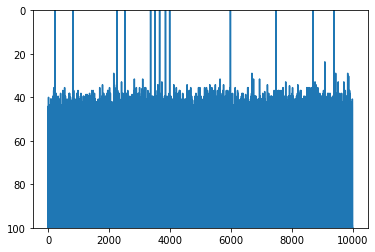

In [48]:
plt.plot(top_score)
plt.axis(ymin=100 , ymax= 0)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x30f1d928c8>,
 'caps': [<matplotlib.lines.Line2D at 0x30f1d92c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x30f1d8afc8>],
 'medians': [<matplotlib.lines.Line2D at 0x30f1d97908>],
 'fliers': [<matplotlib.lines.Line2D at 0x30f1d97f08>],
 'means': []}

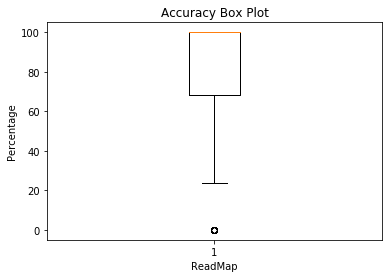

In [61]:
fig1, ax1 = plt.subplots()
ax1.set_title('Accuracy Box Plot')
ax1.set_ylabel('Percentage')
ax1.set_xlabel('ReadMap')
ax1.boxplot(top_score)

In [60]:
import numpy as np
#mean value
mean= np.mean(top_score)
#median value
median = np.median(top_score)


print('Mean: ' + str(mean))
print('Median: ' + str(median))

print("The 1st percentile is:   " + str(np.percentile(top_score, 1)))
print("The 10th percentile is:  " + str(np.percentile(top_score, 10)))
print("The 20th percentile is:  " + str(np.percentile(top_score, 20)))
print("The 30th percentile is:  " + str(np.percentile(top_score, 30)))
print("The 40th percentile is:  " + str(np.percentile(top_score, 40)))
print("The 50th percentile is:  " + str(np.percentile(top_score, 50)))
print("The 60th percentile is:  " + str(np.percentile(top_score, 60)))
print("The 70th percentile is:  " + str(np.percentile(top_score, 70)))
print("The 80th percentile is:  " + str(np.percentile(top_score, 80)))
print("The 90th percentile is:  " + str(np.percentile(top_score, 90)))
print("The 100th percentile is: " + str(np.percentile(top_score, 100)))

Mean: 85.29570033781314
Median: 100.0
The 1st percentile is:   36.84210526315789
The 10th percentile is:  43.42105263157895
The 20th percentile is:  50.0
The 30th percentile is:  93.42105263157895
The 40th percentile is:  98.68421052631578
The 50th percentile is:  100.0
The 60th percentile is:  100.0
The 70th percentile is:  100.0
The 80th percentile is:  100.0
The 90th percentile is:  100.0
The 100th percentile is: 100.0
